In [1]:
import cv2 
import numpy as np
import glob
import os
from itertools import combinations 
from itertools import product
import random
import matplotlib.pyplot as plt
from random import randrange
import sys
import math
#apt install python-pydot python-pydot-ng graphviz

In [2]:
# import cv2 
# import numpy as np
# import glob
# import os
# from itertools import combinations 
# from itertools import product
# import random
# import matplotlib.pyplot as plt
# from random import randrange
# import sys
#apt install python-pydot python-pydot-ng graphviz

In [3]:
!{sys.executable} -m pip install pydot
!{sys.executable} -m pip install pydotplus
!{sys.executable} -m pip install graphviz

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [4]:
import tensorflow as tf 
from tensorflow.keras.layers import Dense, MaxPooling2D, Convolution2D, Dropout, Input, Flatten,Conv2D,Conv2DTranspose,Lambda,concatenate,GlobalMaxPooling2D,Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model,Sequential
#from keras.initializers.h as 
from tensorflow.python.keras.utils.vis_utils import plot_model

#below is specific for tf2
from tensorflow.keras.layers.experimental.preprocessing import RandomRotation

#for tf1 random rotation
#tf.keras.preprocessing.image.random_rotation
#from tensorflow.keras.preprocessing.image import random_rotation


#from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.keras.models import load_model
from tensorflow.keras.regularizers import l2 
from pandas import read_excel
import pydot


!{sys.executable} -m pip install tensorflow-addons

### below is specific for tf2
import tensorflow_addons as tfa

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


/usr/local/lib/python3.8/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:37: UserWarning: You are currently using a nightly version of TensorFlow (2.9.0-dev20220126). 
TensorFlow Addons offers no support for the nightly versions of TensorFlow. Some things might work, some other might not. 
If you encounter a bug, do not file an issue on GitHub.
  warnings.warn(


In [5]:
print(tf.__version__)

2.9.0-dev20220126


In [6]:
path_input_images =  '/tensorflow/UBIRS_segnet_data/UNIRIS_siamese/images_siamese/'

In [7]:
mask_path  = '/tensorflow/UBIRS_segnet_data/UNIRIS_siamese/mask_siamese/'

In [8]:
# data = read_excel(data_in_labels_path, sheetname='Sheet1')

In [9]:
# data.head()

In [10]:
# def change_name(name):
#     d = name.split('/')
#     mask_name = 'frame' + '_' + d[0]+'_'+d[1] +'.png'
#     return mask_name


In [11]:
pos_comb1 = np.array(list(combinations([1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14], 2)))
#pos_comb1 = np.array(list(combinations([1, 2, 3, 4, 5], 2)))
print(len(pos_comb1))

91


In [12]:
def change_name(name):
    d = name.split('/')
    mask_name = 'frame' + '_' + d[0]+'_'+d[1] +'.png'
    return mask_name

In [13]:
#rows = data[data['image_name']=='001_04.bmp']

In [14]:
#rows['Y1p'].iloc[0]


In [15]:
def read_simaese_parametric_data(path_input_images, folder_name_list_batch,mask_path,batch_size):
    
    
    h  = 128
    w = 128 
    c = 3
    factor  = 4
    
    train_out1 = np.zeros((factor*batch_size,h,w,c),'float')
    train_out2 = np.zeros((factor*batch_size,h,w,c),'float')
    train_seg1 = np.zeros((factor*batch_size,h,w,1),'float')
    train_seg2 = np.zeros((factor*batch_size,h,w,1),'float')
    
    out1= np.zeros((factor*batch_size,h,w,c),'float')
    out2= np.zeros((factor*batch_size,h,w,c),'float')
    
    seg1= np.zeros((factor*batch_size,h,w,1),'float')
    seg2= np.zeros((factor*batch_size,h,w,1),'float')
    
    #pos_comb1 = np.array(list(combinations([1, 2, 3, 4, 5,6,7,8,9,10], 2)))
    
    pos_comb1 = np.array(list(combinations([1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14], 2)))
    #pos_comb2 = np.array(list(combinations([6, 7, 8, 9, 10], 2)))

    #neg_comb1 = np.array(list(product([2,3,4,5], [8,9,10])))
    #
    count = 0
    y = []
    
    for folder_name in folder_name_list_batch:

        for j in range (len(pos_comb1)-90):
           
            i = random.randint(0, 90)
            
            k = random.randint(0, 90)
        
            ## read the image from folder in postive combination 
            #print('pos_combi =' + folder_name + '/'+ str(pos_comb1[i][0]).zfill(2)+'.bmp')
            img1_0 = cv2.imread(path_input_images + folder_name + '/'+ str(pos_comb1[i][0]).zfill(2)+'.png')
            
            
            img1_1 = cv2.imread(path_input_images + folder_name + '/'+ str(pos_comb1[i][1]).zfill(2)+'.png')
#             print('pos_combi =' + folder_name + '/'+ str(pos_comb1[i][1]).zfill(2)+'.bmp')
            
            img1_0 = cv2.resize(img1_0,(h,w))    #c = 1
            img1_1 = cv2.resize(img1_1,(h,w))    
#             img1_0 = cv2.resize(img1_0[:,:,0],(h,w))    #c = 1
#             img1_1 = cv2.resize(img1_1[:,:,0],(h,w))
            ##get the correspondance segmentation data 
#             name1 = folder_name + '/'+ str(pos_comb1[i][0]).zfill(2)
#             name2 = folder_name + '/'+ str(pos_comb1[i][1]).zfill(2)
            #print(mask_path + folder_name + '/'+ str(pos_comb1[i][0]).zfill(2)+'.png')
            seg1_0 = cv2.imread(mask_path + folder_name + '/'+ str(pos_comb1[i][0]).zfill(2)+'.png')
            seg1_1 = cv2.imread(mask_path + folder_name + '/'+ str(pos_comb1[i][1]).zfill(2)+'.png')
#             seg1_0 = cv2.imread(mask_path + change_name(name1))
#             seg1_1 = cv2.imread(mask_path + change_name(name2))
            ###############################################################
            seg1_0 = cv2.cvtColor(seg1_0,cv2.COLOR_BGR2GRAY)
            seg1_1 = cv2.cvtColor(seg1_1,cv2.COLOR_BGR2GRAY)
            
            seg1_0 = cv2.resize(seg1_0,(h,w))
            seg1_1 = cv2.resize(seg1_1,(h,w))
            
            ## save the image data to out and out2  
            
            out1[count]  = img1_0#img1_0
            out2[count]  = img1_1#img1_1
#             out1[count]  = np.expand_dims(img1_0,axis=2) #img1_0
#             out2[count]  = np.expand_dims(img1_1,axis=2) #img1_1
            seg1[count]  = np.expand_dims(seg1_0,axis=2)
            seg2[count]  = np.expand_dims(seg1_1,axis=2)
            
            #save the segmentation data to lable 

            
            ## posive combination assigning 0 to last clolumn
            y.append(1.0)
            
            ## increament the count
            count = count+1
            
            

            img2_0 = cv2.imread(path_input_images + folder_name + '/'+ str(pos_comb1[k][0]).zfill(2)+'.png')
            img2_1 = cv2.imread(path_input_images + folder_name + '/'+ str(pos_comb1[k][1]).zfill(2)+'.png')
            img2_0 = cv2.resize(img2_0,(h,w)) ## C = 1
            img2_1 = cv2.resize(img2_1,(h,w))  ## c = 1
            
#             img2_0 = cv2.resize(img2_0[:,:,0],(h,w)) ## C = 1
#             img2_1 = cv2.resize(img2_1[:,:,0],(h,w))  ## c = 1            
#             name1 = folder_name + '/'+ str(pos_comb2[i][0]).zfill(2)
#             name2 = folder_name + '/'+ str(pos_comb2[i][1]).zfill(2)
#             seg2_0 = cv2.imread(mask_path + change_name(name1))
#             seg2_1 = cv2.imread(mask_path + change_name(name2)) 
            seg2_0 = cv2.imread(mask_path + folder_name + '/'+ str(pos_comb1[k][0]).zfill(2)+'.png')
            seg2_1 = cv2.imread(mask_path + folder_name + '/'+ str(pos_comb1[k][1]).zfill(2)+'.png') 
            
            seg2_0 = cv2.cvtColor(seg2_0,cv2.COLOR_BGR2GRAY)
            seg2_1 = cv2.cvtColor(seg2_1,cv2.COLOR_BGR2GRAY)
            seg2_0 = cv2.resize(seg2_0,(h,w))
            seg2_1 = cv2.resize(seg2_1,(h,w))
            
            out1[count]  = img2_0 #img2_0
            out2[count]  = img2_1 #img2_1
            
#             out1[count]  = np.expand_dims(img2_0,axis=2)#img2_0
#             out2[count]  = np.expand_dims(img2_1,axis=2)#img2_1
            seg1[count]  = np.expand_dims(seg2_0,axis=2)
            seg2[count]  = np.expand_dims(seg2_1,axis=2)          

            y.append(1.0)
            count = count+1

            
            ## negative combination left vs right iris for same person 
            folder_name2 = str(int(folder_name) + 1).zfill(3)
#             print('neg_combi =' + folder_name2 + '/'+ str(neg_comb1[i][1]).zfill(2)+'.bmp')
#             print('neg_combi =' + folder_name + '/'+ str(neg_comb1[i][0]).zfill(2)+'.bmp')
            img3_0 = cv2.imread(path_input_images + folder_name + '/'+ str(pos_comb1[i][0]).zfill(2)+'.png')
            img3_1 = cv2.imread(path_input_images + folder_name2 + '/'+ str(pos_comb1[i][1]).zfill(2)+'.png')
#             img3_0 = cv2.resize(img3_0[:,:,0],(h,w))  #c = 1
#             img3_1 = cv2.resize(img3_1[:,:,0],(h,w))
            img3_0 = cv2.resize(img3_0,(h,w))  #c = 1
            img3_1 = cv2.resize(img3_1,(h,w))            
#             name1 = folder_name + '/'+ str(neg_comb1[i][0]).zfill(2)
#             name2 = folder_name + '/'+ str(neg_comb1[i][1]).zfill(2)
            seg3_0 = cv2.imread(mask_path + folder_name + '/'+ str(pos_comb1[i][0]).zfill(2)+'.png')
            seg3_1 = cv2.imread(mask_path + folder_name2 + '/'+ str(pos_comb1[i][1]).zfill(2)+'.png')
            
            seg3_0 = cv2.cvtColor(seg3_0,cv2.COLOR_BGR2GRAY)
            seg3_1 = cv2.cvtColor(seg3_1,cv2.COLOR_BGR2GRAY)
            
            seg3_0 = cv2.resize(seg3_0,(h,w))
            seg3_1 = cv2.resize(seg3_1,(h,w))
            out1[count]  = img3_0 #img3_0
            out2[count]  = img3_1 #img3_1            
#             out1[count]  = np.expand_dims(img3_0,axis=2) #img3_0
#             out2[count]  = np.expand_dims(img3_1,axis=2) #img3_1
            seg1[count]  = np.expand_dims(seg3_0,axis=2)
            seg2[count]  = np.expand_dims(seg3_1,axis=2)
            ## assigning 1 to negative combinations (left vs right image)
            y.append(0.0)
            count = count+1

            
            ## creating the negativ combination from diffrent person 
            folder_name1 = str(int(folder_name) + 3).zfill(3) 
            img4_0 = cv2.imread(path_input_images + folder_name + '/'+ str(pos_comb1[k][0]).zfill(2)+'.png')
            img4_1 = cv2.imread(path_input_images + folder_name1 + '/'+ str(pos_comb1[k][1]).zfill(2)+'.png')

#             img4_0 = cv2.resize(img4_0[:,:,0],(h,w))
#             img4_1 = cv2.resize(img4_1[:,:,0],(h,w))
            img4_0 = cv2.resize(img4_0,(h,w))
            img4_1 = cv2.resize(img4_1,(h,w))
#             name1 = folder_name + '/'+ str(pos_comb1[i][0]).zfill(2)
#             name2 = folder_name1 + '/'+ str(pos_comb1[i][1]).zfill(2)
            seg4_0 = cv2.imread(mask_path + folder_name + '/'+ str(pos_comb1[k][0]).zfill(2)+'.png')
            seg4_1 = cv2.imread(mask_path + folder_name1 + '/'+ str(pos_comb1[k][1]).zfill(2)+'.png')

            seg4_0 = cv2.cvtColor(seg4_0,cv2.COLOR_BGR2GRAY)
            seg4_1 = cv2.cvtColor(seg4_1,cv2.COLOR_BGR2GRAY)        

            seg4_0 = cv2.resize(seg4_0,(h,w))
            seg4_1 = cv2.resize(seg4_1,(h,w))
            
            out1[count]  = img4_0#img4_0
            out2[count]  = img4_1 #img4_1
            
#             out1[count]  = np.expand_dims(img4_0,axis=2)#img4_0
#             out2[count]  = np.expand_dims(img4_1,axis=2) #img4_1
            seg1[count]  = np.expand_dims(seg4_0,axis=2)
            seg2[count]  = np.expand_dims(seg4_1,axis=2)
            y.append(0.0)
            count = count+1
            #print(i)
            
    ## this padding the data set for size 256x512 to maintain spect rationa nd segmentation parameters 
    train_out1 = out1
    train_out2 = out2 
    
    train_seg1 = seg1
    train_seg2 = seg2  
    
    
#     train_out1[:,0:240,0:320,:] = out1
#     train_out2[:,0:240,0:320,:] = out2 
    
#     train_seg1[:,0:240,0:320,:] = seg1
#     train_seg2[:,0:240,0:320,:] = seg2     
    
    return train_out1,train_out2,train_seg1,train_seg2,y
        #print(count) 

In [16]:
#print(np.array(list(product([2,3,4,5], [8,9,10]))))
print(np.array(list(combinations([1, 2, 3, 4, 5], 2))))


[[1 2]
 [1 3]
 [1 4]
 [1 5]
 [2 3]
 [2 4]
 [2 5]
 [3 4]
 [3 5]
 [4 5]]


In [17]:
#fileList = listOfFiles     
def imageLoader(path_input_images,folder_name_list,mask_path,batch_size):

    L = len(folder_name_list)

    #this line is just to make the generator infinite, keras needs that    
    while True:

        batch_start = randrange(L-batch_size)
        batch_end = batch_start + batch_size

        if (batch_end < L):
            limit = min(batch_end, L)
            train_out1,train_out2,train_seg1,train_seg2,y_class = read_simaese_parametric_data(path_input_images,folder_name_list[batch_start:limit],mask_path,batch_size)
            train_out1 = train_out1/255.
            train_out2 = train_out2/255.
            train_seg1 = train_seg1/255.
            train_seg2 = train_seg2/255.
            batch_start = batch_end
            batch_end = batch_start + batch_size
            #print(batch_start,batch_end)
            ## just for the test 
            #yield (train_out2,train_seg2)
            ## original
            yield ([train_out1,train_out2],[train_seg1,train_seg2,np.array(y_class)]) #a tuple with two numpy arrays with batch_size samples     

In [18]:
folder_names = np.sort(os.listdir(path_input_images))
folder_name_list = folder_names[0:75] 
folder_name_list_test = folder_names[75:95]
print(len(folder_name_list_test))

20


### Function to check the GT and loader 

In [19]:
def draw_haugh_circle(img_L,img_R, hough_param):        
    
    
    print('pair_classification =', int(hough_param[12]))
    cimg = img_L.copy()
    cv2.circle(cimg,(int(hough_param[0]),int(hough_param[1])),int(hough_param[2]),(0,255,0),2)
                # draw the center of the circle
    cv2.circle(cimg,(int(hough_param[0]),int(hough_param[1])),2,(0,255,0),3)

                #for i in circles_inner[0,:]:
                # draw the outer circle
    cv2.circle(cimg,(int(hough_param[3]),int(hough_param[4])),int(hough_param[5]),(0,0,255),2)
                # draw the center of the circle
    cv2.circle(cimg,(int(hough_param[3]),int(hough_param[4])),2,(0,0,255),3)
    plt.title('left_image')
    plt.imshow(cimg)
    plt.show()
    
    
    cimg = img_R.copy()
    cv2.circle(cimg,(int(hough_param[6]),int(hough_param[7])),int(hough_param[8]),(0,255,0),2)
                # draw the center of the circle
    cv2.circle(cimg,(int(hough_param[6]),int(hough_param[7])),2,(0,255,0),3)

                #for i in circles_inner[0,:]:
                # draw the outer circle
    cv2.circle(cimg,(int(hough_param[9]),int(hough_param[10])),int(hough_param[11]),(0,0,255),2)
                # draw the center of the circle
    cv2.circle(cimg,(int(hough_param[9]),int(hough_param[10])),2,(0,0,255),3)
    plt.title('right_image')
    plt.imshow(cimg)
    plt.show()

In [20]:
g=0
while (g < 5):

    Out = next(imageLoader(path_input_images,folder_name_list,mask_path,4))
    g = g+1


In [21]:
images_L_R = Out[0]
image_L = images_L_R[0]
image_R = images_L_R[1]

mask_L_R_class = Out[1]

mask_L = mask_L_R_class[0]
mask_R = mask_L_R_class[1]
y = mask_L_R_class[2]
print(y[0])
print(image_L.shape)

1.0
(16, 128, 128, 3)


# mask_L.shape

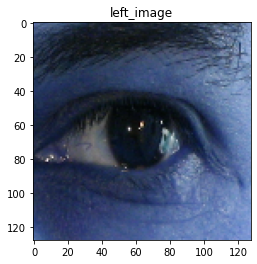

In [22]:
plt.title('left_image')
plt.imshow(np.squeeze(image_R[1]))
plt.show()

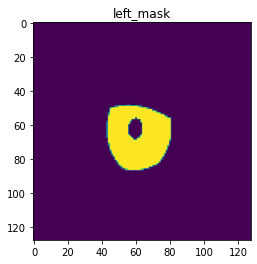

In [23]:
plt.title('left_mask')
plt.imshow(np.squeeze(mask_R[1]))
plt.show()

In [24]:
#pos_comb1 = np.array(list(combinations([1, 2, 3, 4, 5], 2)))
#pos_comb2 = np.array(list(combinations([6, 7, 8, 9, 10], 2)))

#neg_comb1 = np.array(list(product([2,3,4,5], [8,9,10])))
#print(neg_comb1)

In [25]:
folder_names = np.sort(os.listdir(path_input_images))

print(folder_names[0:20])

['000' '001' '002' '003' '004' '005' '006' '007' '008' '009' '010' '011'
 '012' '013' '014' '015' '016' '017' '018' '019']


In [26]:
# def conv2d_block(input_tensor, n_filters, kernel_size = 3, batchnorm = True):
#     """Function to add 2 convolutional layers with the parameters passed to it"""
#     # first layer
#     x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
#               kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
#     if batchnorm:
#         x = BatchNormalization()(x)
#     x = Activation('relu')(x)
    
#     # second layer
#     x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
#               kernel_initializer = 'he_normal', padding = 'same')(x)
#     if batchnorm:
#         x = BatchNormalization()(x)
#     x = Activation('relu')(x)
    
#     return x

In [27]:
initialize_weights = 'he_normal'
initialize_bias = 'he_normal'

In [28]:
def base_network_unet():
    input = Input(shape=(128,128,3), name="base_input")
    n_filters=16
    dropout=.1
    batchnorm=True
       
    c1 = Conv2D(n_filters*1, (3,3), activation='relu',
                   kernel_initializer=initialize_weights,padding = 'same', kernel_regularizer=l2(2e-4))(input)
    p1 = MaxPooling2D((2,2))(c1)           # (h/2,w/2,16)
    p1 = Dropout(dropout)(p1) 

    c2 = Conv2D(n_filters*2, (3,3), activation='relu',
                   kernel_initializer=initialize_weights,padding = 'same', kernel_regularizer=l2(2e-4))(p1)
    p2 = MaxPooling2D((2,2))(c2)  # (h/4,w/4,32)
    p2 = Dropout(dropout)(p2) 

    c3 = Conv2D(n_filters*4, (3,3), activation='relu',
                   kernel_initializer=initialize_weights, padding = 'same', kernel_regularizer=l2(2e-4))(p2)
    p3 = MaxPooling2D((2,2))(c3)  # (h/8,w/8,64)
    p3 = Dropout(dropout)(p3) 

    c4 = Conv2D(n_filters*8, (3,3), activation='relu',
                   kernel_initializer=initialize_weights, padding = 'same', kernel_regularizer=l2(2e-4))(p3)
    p4 = MaxPooling2D((2,2))(c4)  # (h/16,w/16,128)
    p4 = Dropout(dropout)(p4) 

    c5 = Conv2D(n_filters*16, (3,3), activation='relu',
                   kernel_initializer=initialize_weights, padding = 'same', kernel_regularizer=l2(2e-4))(p4)      # (h/16,w/16,256)


    print("encoder done")


    u6 = Conv2DTranspose(n_filters * 8, (3, 3), strides = (2, 2), padding = 'same')(c5)  # (h/8,w/8,128)
    u6 = concatenate([u6, c4])   # (h/8,w/8,128)
    u6 = Dropout(dropout)(u6)
        
    c6 = Conv2D(n_filters*8, (3,3), activation='relu',
                   kernel_initializer=initialize_weights, padding = 'same', kernel_regularizer=l2(2e-4))(u6) # (h/8,w/8,128)

    u7 = Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(c6)  # (h/4,w/4,64)
    u7 = concatenate([u7, c3])   # (h/8,w/8,128)
    u7 = Dropout(dropout)(u7)
    c7 = Conv2D(n_filters*4, (3,3), activation='relu',
                   kernel_initializer=initialize_weights, padding = 'same', kernel_regularizer=l2(2e-4))(u7) # (h/4,w/4,64)

    u8 = Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(c7)  # (h/2,w/2,32)
    u8 = concatenate([u8, c2])   # (h/2,w/2,32)
    u8 = Dropout(dropout)(u8)
    c8 = Conv2D(n_filters*2, (3,3), activation='relu',
                   kernel_initializer=initialize_weights, padding = 'same', kernel_regularizer=l2(2e-4))(u8)     # (h/2,w/2,32)

    u9 = Conv2DTranspose(n_filters, (3, 3), strides = (2, 2), padding = 'same')(c8)  # (h,w,16)
    u9 = concatenate([u9, c1])   # (h,w,16)
    u9 = Dropout(dropout)(u9)
    c9 = Conv2D(n_filters, (3,3), activation='relu',
                   kernel_initializer=initialize_weights, padding = 'same', kernel_regularizer=l2(2e-4))(u9)     # (h,w,16)    


    print("decoder done . . .  siamese network will start" )
    X_outputs = Conv2D(1,(1,1),activation='sigmoid',name='seg_out')(c9)
   
    print("simaese model done")
    return Model(inputs=input, outputs=[X_outputs,c9])
    
    

In [29]:
def base_network_siamese():
    
    input = Input(shape=(128,128,16), name="base_input")
#     degrees  = tf.constant(0,dtype='float32')
#     r1 = tfa.image.rotate(input[0],input[1])
    
    c10 = Conv2D(64, (10,10), activation='relu',
                   kernel_initializer=initialize_weights, kernel_regularizer=l2(2e-4))(input)
    p10 = MaxPooling2D()(c10)
    
#     r10 = tfa.image.rotate(p10,degrees, interpolation='BILINEAR')
    
    c11 = Conv2D(128, (7,7), activation='relu',
                     kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4))(p10)
    p11 = MaxPooling2D()(c11)
    c12 = Conv2D(128, (4,4), activation='relu', kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4))(p11)
    p12 = MaxPooling2D()(c12)
    c13 = Conv2D(256, (4,4), activation='relu', kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4))(p12)
    a1 = Flatten()(c13)
    a2 = Dense(128, activation='relu',
                   kernel_regularizer=l2(1e-3),
                   kernel_initializer=initialize_weights,bias_initializer=initialize_bias)(a1)  
    
    print("simaese model done")
    return Model(inputs=input, outputs=a2)

In [30]:
def euclidean_distance(vects):
    x, y = vects
    
    x0, x1, x2, x3, x4 = tf.split(x, num_or_size_splits=5, axis=1)
    
    y0, y1, y2, y3, y4 = tf.split(y, num_or_size_splits=5, axis=1)

#     v_size =128
#     sum_square_1 = K.sum(K.square(x[0:128] - y[0:128]), axis=1, keepdims=True)           ## batch_size x 1 
#     sum_square_2 = K.sum(K.square(x[0:128] - y[128:2*128]), axis=1, keepdims=True)    ## batch_size x 1 
#     sum_square_3 = K.sum(K.square(x[0:128] - y[2*128:3*128]), axis=1, keepdims=True)    ## batch_size x 1 
#     sum_square_4 = K.sum(K.square(x[0:128] - y[3*128:4*128]), axis=1, keepdims=True)    ## batch_size x 1 
#     sum_square_5 = K.sum(K.square(x[0:128] - y[4*128:5*128]), axis=1, keepdims=True)    ## batch_size x 1 
    
    
#     min_sum_square1 =  K.minimum(sum_square_1,sum_square_2)
#     min_sum_square2 = K.minimum(sum_square_3,sum_square_4)
#     min_sum_square3 = K.minimum(min_sum_square1,min_sum_square2)
#     min_sum_square4 = K.minimum(min_sum_square3,sum_square_5)
    
    
    
    sum_square_1 = K.sum(K.square(x0 - y0), axis=1, keepdims=True)           ## batch_size x 1 
    sum_square_2 = K.sum(K.square(x0 - y1), axis=1, keepdims=True)    ## batch_size x 1 
    sum_square_3 = K.sum(K.square(x0 - y2), axis=1, keepdims=True)    ## batch_size x 1 
    sum_square_4 = K.sum(K.square(x0 - y3), axis=1, keepdims=True)    ## batch_size x 1 
    sum_square_5 = K.sum(K.square(x0 - y4), axis=1, keepdims=True)    ## batch_size x 1 
    
    
    min_sum_square1 =  K.minimum(sum_square_1,sum_square_2)
    min_sum_square2 = K.minimum(sum_square_3,sum_square_4)
    min_sum_square3 = K.minimum(min_sum_square1,min_sum_square2)
    min_sum_square4 = K.minimum(min_sum_square3,sum_square_5) 
    
    
    
    return K.sqrt(K.maximum(min_sum_square4, K.epsilon()))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

In [31]:
base_network_1 = base_network_unet()
#below is specific to tf2
#plot_model(base_network_1, show_shapes=True, show_layer_names=True, to_file='base-model.png')

encoder done
decoder done . . .  siamese network will start
simaese model done


2022-02-07 08:10:56.513566: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-07 08:10:56.518414: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-07 08:10:56.518749: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-07 08:10:56.519385: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [32]:
base_network_2 = base_network_siamese()
#plot_model(base_network_2, show_shapes=True, show_layer_names=True, to_file='base-model.png')

simaese model done


In [33]:
# create the left input and point to the base network
input_a = Input(shape=(128,128,3), name="left_input")

seg_a , seg_logit_a = base_network_1(input_a)

# create the right input and point to the base network
input_b = Input(shape=(128,128,3), name="right_input")

seg_b, seg_logit_b = base_network_1(input_b)

degree_1  = (2*np.pi/360)
delta = .000001


#below is specific for tf2 working

seg_logit_b_1 = RandomRotation(factor=(degree_1,degree_1+delta))(seg_logit_b)
seg_logit_b_2 = RandomRotation(factor=(2*degree_1,2*degree_1+delta))(seg_logit_b)
seg_logit_b_n1 = RandomRotation(factor=(-1*degree_1,-1*degree_1+delta))(seg_logit_b)
seg_logit_b_n2 = RandomRotation(factor=(-2*degree_1,-2*degree_1+delta))(seg_logit_b)


## below is specific for tf1 and not wokring

# seg_logit_b_1 = random_rotation(seg_logit_b,rg=1)
# seg_logit_b_2 = random_rotation(seg_logit_b,rg=2)
# seg_logit_b_n1 = random_rotation(seg_logit_b,rg=-1)
# seg_logit_b_n2 = random_rotation(seg_logit_b,rg=-2)



vect_a0 = base_network_2(seg_logit_a)





vect_0 = base_network_2(seg_logit_b)
vect_1 = base_network_2(seg_logit_b_1)
vect_2 = base_network_2(seg_logit_b_2)
vect_n1 = base_network_2(seg_logit_b_n1)
vect_n2 = base_network_2(seg_logit_b_n2)

vect_output_b = concatenate([vect_0, vect_1, vect_2, vect_n1, vect_n2]) 

vect_output_a = concatenate([vect_a0, vect_1, vect_2, vect_n1, vect_n2])  

# # measure the similarity of the two vector outputs
output_siasmese = Lambda(euclidean_distance, name="output_layer", output_shape=(128,1))([vect_output_a, vect_output_b])

# # specify the inputs and output of the model
model = Model([input_a, input_b], [seg_a,seg_b,output_siasmese])


In [34]:
#plot_model(model, show_shapes=True, show_layer_names=True, to_file='outer-model.png')

In [35]:
def contrastive_loss_with_margin(margin):
    def contrastive_loss(y_true, y_pred):
        '''Contrastive loss from Hadsell-et-al.'06
        http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
        '''
        square_pred = K.square(y_pred)
        margin_square = K.square(K.maximum(margin - y_pred, 0))
        return K.mean(y_true * square_pred + (1 - y_true) * margin_square)
    return contrastive_loss

In [36]:
#optimizer = keras.optimizers.Adam(lr = 0.0001)


#siamese_model.compile(loss=custom_loss, optimizer=optimizer, metrics = ['mae', 'acc'])
model.compile(loss = {'model' : "binary_crossentropy",
                      'model_1' : "binary_crossentropy",
                      'output_layer' : contrastive_loss_with_margin(margin=1)
                     },optimizer='Adam', metrics = ['mae', 'acc'])

In [37]:
#steps_per_epoch = train_length // batch_size
batch_size = 4
steps_per_epoch = len(folder_name_list) // batch_size
validation_steps = len(folder_name_list_test) // batch_size

In [38]:

# history = siamese_model.fit_generator(imageLoader(path_input_images,folder_name_list,batch_size),steps_per_epoch,
#                     validation_data = imageLoader(path_input_images,folder_name_list_test,batch_size), 
#                     validation_steps=validation_steps, epochs=50)

In [39]:
history = model.fit_generator(imageLoader(path_input_images,folder_name_list,mask_path,batch_size),steps_per_epoch,
                    validation_data = imageLoader(path_input_images,folder_name_list_test,mask_path,batch_size), 
                    validation_steps=validation_steps, epochs=1001)

/tmp/ipykernel_11905/2313961078.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(imageLoader(path_input_images,folder_name_list,mask_path,batch_size),steps_per_epoch,


Epoch 1/1001


2022-02-07 08:11:07.319074: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100
2022-02-07 08:11:08.325483: I tensorflow/core/util/cuda_solvers.cc:179] Creating GpuSolver handles for stream 0x791f570


18/18 [==============================] - 15s 459ms/step - loss: 2.3590 - model_loss: 0.4887 - model_1_loss: 0.4735 - output_layer_loss: 0.6938 - model_mae: 0.3741 - model_acc: 0.8884 - model_1_mae: 0.3657 - model_1_acc: 0.9110 - output_layer_mae: 0.7382 - output_layer_acc: 0.4722 - val_loss: 1.7101 - val_model_loss: 0.3616 - val_model_1_loss: 0.3313 - val_output_layer_loss: 0.3537 - val_model_mae: 0.2883 - val_model_acc: 0.9172 - val_model_1_mae: 0.2683 - val_model_1_acc: 0.9415 - val_output_layer_mae: 0.5234 - val_output_layer_acc: 0.5000
Epoch 2/1001
18/18 [==============================] - 8s 434ms/step - loss: 1.4129 - model_loss: 0.2631 - model_1_loss: 0.2211 - output_layer_loss: 0.2768 - model_mae: 0.1861 - model_acc: 0.9183 - model_1_mae: 0.1621 - model_1_acc: 0.9434 - output_layer_mae: 0.5498 - output_layer_acc: 0.4479 - val_loss: 1.2900 - val_model_loss: 0.2297 - val_model_1_loss: 0.1753 - val_output_layer_loss: 0.2461 - val_model_mae: 0.1370 - val_model_acc: 0.9068 - val_mode

Epoch 16/1001
18/18 [==============================] - 7s 413ms/step - loss: 0.8525 - model_loss: 0.1331 - model_1_loss: 0.1029 - output_layer_loss: 0.1746 - model_mae: 0.0868 - model_acc: 0.9194 - model_1_mae: 0.0683 - model_1_acc: 0.9445 - output_layer_mae: 0.7553 - output_layer_acc: 0.2743 - val_loss: 0.8975 - val_model_loss: 0.1620 - val_model_1_loss: 0.1170 - val_output_layer_loss: 0.1815 - val_model_mae: 0.0843 - val_model_acc: 0.9014 - val_model_1_mae: 0.0618 - val_model_1_acc: 0.9320 - val_output_layer_mae: 0.7545 - val_output_layer_acc: 0.2500
Epoch 17/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.7760 - model_loss: 0.1018 - model_1_loss: 0.0812 - output_layer_loss: 0.1603 - model_mae: 0.0710 - model_acc: 0.9525 - model_1_mae: 0.0579 - model_1_acc: 0.9652 - output_layer_mae: 0.7654 - output_layer_acc: 0.2222 - val_loss: 0.9281 - val_model_loss: 0.1449 - val_model_1_loss: 0.1378 - val_output_layer_loss: 0.2172 - val_model_mae: 0.0603 - val_model_acc: 0.9

Epoch 31/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.6348 - model_loss: 0.0838 - model_1_loss: 0.0626 - output_layer_loss: 0.1518 - model_mae: 0.0546 - model_acc: 0.9653 - model_1_mae: 0.0425 - model_1_acc: 0.9729 - output_layer_mae: 0.7411 - output_layer_acc: 0.2257 - val_loss: 0.7033 - val_model_loss: 0.0856 - val_model_1_loss: 0.0598 - val_output_layer_loss: 0.2243 - val_model_mae: 0.0472 - val_model_acc: 0.9651 - val_model_1_mae: 0.0346 - val_model_1_acc: 0.9747 - val_output_layer_mae: 0.7255 - val_output_layer_acc: 0.3250
Epoch 32/1001
18/18 [==============================] - 7s 415ms/step - loss: 0.5904 - model_loss: 0.0861 - model_1_loss: 0.0576 - output_layer_loss: 0.1159 - model_mae: 0.0530 - model_acc: 0.9634 - model_1_mae: 0.0367 - model_1_acc: 0.9760 - output_layer_mae: 0.8635 - output_layer_acc: 0.1562 - val_loss: 0.6105 - val_model_loss: 0.0810 - val_model_1_loss: 0.0617 - val_output_layer_loss: 0.1403 - val_model_mae: 0.0526 - val_model_acc: 0.9

Epoch 46/1001
18/18 [==============================] - 7s 413ms/step - loss: 0.5653 - model_loss: 0.0626 - model_1_loss: 0.0561 - output_layer_loss: 0.1819 - model_mae: 0.0425 - model_acc: 0.9725 - model_1_mae: 0.0356 - model_1_acc: 0.9747 - output_layer_mae: 0.7464 - output_layer_acc: 0.2361 - val_loss: 0.5431 - val_model_loss: 0.0575 - val_model_1_loss: 0.0491 - val_output_layer_loss: 0.1729 - val_model_mae: 0.0323 - val_model_acc: 0.9740 - val_model_1_mae: 0.0283 - val_model_1_acc: 0.9775 - val_output_layer_mae: 0.8458 - val_output_layer_acc: 0.2125
Epoch 47/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.4974 - model_loss: 0.0604 - model_1_loss: 0.0462 - output_layer_loss: 0.1287 - model_mae: 0.0394 - model_acc: 0.9734 - model_1_mae: 0.0301 - model_1_acc: 0.9793 - output_layer_mae: 0.7796 - output_layer_acc: 0.1771 - val_loss: 0.5506 - val_model_loss: 0.0664 - val_model_1_loss: 0.0612 - val_output_layer_loss: 0.1626 - val_model_mae: 0.0366 - val_model_acc: 0.9

Epoch 61/1001
18/18 [==============================] - 7s 413ms/step - loss: 0.4089 - model_loss: 0.0483 - model_1_loss: 0.0365 - output_layer_loss: 0.1064 - model_mae: 0.0316 - model_acc: 0.9778 - model_1_mae: 0.0236 - model_1_acc: 0.9832 - output_layer_mae: 0.9002 - output_layer_acc: 0.1458 - val_loss: 0.5053 - val_model_loss: 0.0973 - val_model_1_loss: 0.0623 - val_output_layer_loss: 0.1298 - val_model_mae: 0.0459 - val_model_acc: 0.9593 - val_model_1_mae: 0.0301 - val_model_1_acc: 0.9739 - val_output_layer_mae: 0.8755 - val_output_layer_acc: 0.1750
Epoch 62/1001
18/18 [==============================] - 7s 416ms/step - loss: 0.4035 - model_loss: 0.0497 - model_1_loss: 0.0381 - output_layer_loss: 0.1011 - model_mae: 0.0309 - model_acc: 0.9772 - model_1_mae: 0.0235 - model_1_acc: 0.9824 - output_layer_mae: 0.9304 - output_layer_acc: 0.1319 - val_loss: 0.4598 - val_model_loss: 0.0722 - val_model_1_loss: 0.0449 - val_output_layer_loss: 0.1300 - val_model_mae: 0.0394 - val_model_acc: 0.9

Epoch 76/1001
18/18 [==============================] - 7s 415ms/step - loss: 0.3232 - model_loss: 0.0401 - model_1_loss: 0.0269 - output_layer_loss: 0.0766 - model_mae: 0.0239 - model_acc: 0.9809 - model_1_mae: 0.0162 - model_1_acc: 0.9869 - output_layer_mae: 1.0070 - output_layer_acc: 0.0938 - val_loss: 0.4205 - val_model_loss: 0.0435 - val_model_1_loss: 0.0283 - val_output_layer_loss: 0.1703 - val_model_mae: 0.0247 - val_model_acc: 0.9806 - val_model_1_mae: 0.0170 - val_model_1_acc: 0.9862 - val_output_layer_mae: 0.8455 - val_output_layer_acc: 0.2500
Epoch 77/1001
18/18 [==============================] - 7s 413ms/step - loss: 0.3222 - model_loss: 0.0346 - model_1_loss: 0.0257 - output_layer_loss: 0.0847 - model_mae: 0.0206 - model_acc: 0.9839 - model_1_mae: 0.0159 - model_1_acc: 0.9881 - output_layer_mae: 0.9693 - output_layer_acc: 0.1111 - val_loss: 0.3336 - val_model_loss: 0.0354 - val_model_1_loss: 0.0270 - val_output_layer_loss: 0.0951 - val_model_mae: 0.0209 - val_model_acc: 0.9

Epoch 91/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.2605 - model_loss: 0.0321 - model_1_loss: 0.0225 - output_layer_loss: 0.0559 - model_mae: 0.0182 - model_acc: 0.9844 - model_1_mae: 0.0132 - model_1_acc: 0.9886 - output_layer_mae: 1.0236 - output_layer_acc: 0.0347 - val_loss: 0.3142 - val_model_loss: 0.0315 - val_model_1_loss: 0.0236 - val_output_layer_loss: 0.1102 - val_model_mae: 0.0194 - val_model_acc: 0.9848 - val_model_1_mae: 0.0142 - val_model_1_acc: 0.9879 - val_output_layer_mae: 0.8946 - val_output_layer_acc: 0.1750
Epoch 92/1001
18/18 [==============================] - 7s 413ms/step - loss: 0.2527 - model_loss: 0.0298 - model_1_loss: 0.0213 - output_layer_loss: 0.0535 - model_mae: 0.0179 - model_acc: 0.9851 - model_1_mae: 0.0127 - model_1_acc: 0.9892 - output_layer_mae: 1.0127 - output_layer_acc: 0.0556 - val_loss: 0.3317 - val_model_loss: 0.0332 - val_model_1_loss: 0.0293 - val_output_layer_loss: 0.1222 - val_model_mae: 0.0197 - val_model_acc: 0.9

Epoch 106/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.2523 - model_loss: 0.0303 - model_1_loss: 0.0257 - output_layer_loss: 0.0658 - model_mae: 0.0178 - model_acc: 0.9851 - model_1_mae: 0.0154 - model_1_acc: 0.9874 - output_layer_mae: 0.9523 - output_layer_acc: 0.0556 - val_loss: 0.2769 - val_model_loss: 0.0414 - val_model_1_loss: 0.0281 - val_output_layer_loss: 0.0776 - val_model_mae: 0.0219 - val_model_acc: 0.9807 - val_model_1_mae: 0.0150 - val_model_1_acc: 0.9863 - val_output_layer_mae: 0.9875 - val_output_layer_acc: 0.0625
Epoch 107/1001
18/18 [==============================] - 7s 418ms/step - loss: 0.2704 - model_loss: 0.0331 - model_1_loss: 0.0230 - output_layer_loss: 0.0851 - model_mae: 0.0191 - model_acc: 0.9838 - model_1_mae: 0.0138 - model_1_acc: 0.9885 - output_layer_mae: 0.9907 - output_layer_acc: 0.0938 - val_loss: 0.3357 - val_model_loss: 0.0374 - val_model_1_loss: 0.0268 - val_output_layer_loss: 0.1431 - val_model_mae: 0.0205 - val_model_acc: 0

Epoch 121/1001
18/18 [==============================] - 7s 415ms/step - loss: 0.2122 - model_loss: 0.0275 - model_1_loss: 0.0189 - output_layer_loss: 0.0514 - model_mae: 0.0165 - model_acc: 0.9865 - model_1_mae: 0.0116 - model_1_acc: 0.9903 - output_layer_mae: 1.0376 - output_layer_acc: 0.0556 - val_loss: 0.2679 - val_model_loss: 0.0561 - val_model_1_loss: 0.0337 - val_output_layer_loss: 0.0644 - val_model_mae: 0.0266 - val_model_acc: 0.9763 - val_model_1_mae: 0.0175 - val_model_1_acc: 0.9849 - val_output_layer_mae: 0.9600 - val_output_layer_acc: 0.0500
Epoch 122/1001
18/18 [==============================] - 7s 415ms/step - loss: 0.2356 - model_loss: 0.0259 - model_1_loss: 0.0198 - output_layer_loss: 0.0768 - model_mae: 0.0151 - model_acc: 0.9870 - model_1_mae: 0.0115 - model_1_acc: 0.9898 - output_layer_mae: 0.9247 - output_layer_acc: 0.1007 - val_loss: 0.2443 - val_model_loss: 0.0320 - val_model_1_loss: 0.0290 - val_output_layer_loss: 0.0701 - val_model_mae: 0.0160 - val_model_acc: 0

Epoch 136/1001
18/18 [==============================] - 7s 413ms/step - loss: 0.2238 - model_loss: 0.0257 - model_1_loss: 0.0200 - output_layer_loss: 0.0795 - model_mae: 0.0148 - model_acc: 0.9871 - model_1_mae: 0.0114 - model_1_acc: 0.9897 - output_layer_mae: 0.9869 - output_layer_acc: 0.1042 - val_loss: 0.2523 - val_model_loss: 0.0280 - val_model_1_loss: 0.0247 - val_output_layer_loss: 0.1009 - val_model_mae: 0.0158 - val_model_acc: 0.9864 - val_model_1_mae: 0.0134 - val_model_1_acc: 0.9879 - val_output_layer_mae: 1.0913 - val_output_layer_acc: 0.1375
Epoch 137/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.2167 - model_loss: 0.0319 - model_1_loss: 0.0198 - output_layer_loss: 0.0660 - model_mae: 0.0182 - model_acc: 0.9845 - model_1_mae: 0.0115 - model_1_acc: 0.9899 - output_layer_mae: 0.9799 - output_layer_acc: 0.0833 - val_loss: 0.2877 - val_model_loss: 0.0353 - val_model_1_loss: 0.0225 - val_output_layer_loss: 0.1307 - val_model_mae: 0.0186 - val_model_acc: 0

Epoch 151/1001
18/18 [==============================] - 7s 416ms/step - loss: 0.2090 - model_loss: 0.0270 - model_1_loss: 0.0202 - output_layer_loss: 0.0714 - model_mae: 0.0162 - model_acc: 0.9866 - model_1_mae: 0.0120 - model_1_acc: 0.9896 - output_layer_mae: 1.0832 - output_layer_acc: 0.0903 - val_loss: 0.2154 - val_model_loss: 0.0310 - val_model_1_loss: 0.0207 - val_output_layer_loss: 0.0740 - val_model_mae: 0.0177 - val_model_acc: 0.9846 - val_model_1_mae: 0.0121 - val_model_1_acc: 0.9895 - val_output_layer_mae: 1.0021 - val_output_layer_acc: 0.0750
Epoch 152/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.1796 - model_loss: 0.0254 - model_1_loss: 0.0175 - output_layer_loss: 0.0475 - model_mae: 0.0146 - model_acc: 0.9870 - model_1_mae: 0.0102 - model_1_acc: 0.9906 - output_layer_mae: 1.0412 - output_layer_acc: 0.0486 - val_loss: 0.2294 - val_model_loss: 0.0244 - val_model_1_loss: 0.0208 - val_output_layer_loss: 0.0956 - val_model_mae: 0.0130 - val_model_acc: 0

Epoch 166/1001
18/18 [==============================] - 7s 413ms/step - loss: 0.1699 - model_loss: 0.0258 - model_1_loss: 0.0193 - output_layer_loss: 0.0464 - model_mae: 0.0143 - model_acc: 0.9865 - model_1_mae: 0.0107 - model_1_acc: 0.9897 - output_layer_mae: 1.0197 - output_layer_acc: 0.0451 - val_loss: 0.1987 - val_model_loss: 0.0295 - val_model_1_loss: 0.0178 - val_output_layer_loss: 0.0732 - val_model_mae: 0.0170 - val_model_acc: 0.9851 - val_model_1_mae: 0.0099 - val_model_1_acc: 0.9907 - val_output_layer_mae: 1.0271 - val_output_layer_acc: 0.0875
Epoch 167/1001
18/18 [==============================] - 7s 415ms/step - loss: 0.1838 - model_loss: 0.0242 - model_1_loss: 0.0185 - output_layer_loss: 0.0631 - model_mae: 0.0149 - model_acc: 0.9876 - model_1_mae: 0.0112 - model_1_acc: 0.9901 - output_layer_mae: 0.9947 - output_layer_acc: 0.0764 - val_loss: 0.2249 - val_model_loss: 0.0295 - val_model_1_loss: 0.0195 - val_output_layer_loss: 0.0981 - val_model_mae: 0.0165 - val_model_acc: 0

Epoch 181/1001
18/18 [==============================] - 7s 415ms/step - loss: 0.1628 - model_loss: 0.0235 - model_1_loss: 0.0184 - output_layer_loss: 0.0499 - model_mae: 0.0131 - model_acc: 0.9878 - model_1_mae: 0.0106 - model_1_acc: 0.9901 - output_layer_mae: 1.0259 - output_layer_acc: 0.0521 - val_loss: 0.1862 - val_model_loss: 0.0214 - val_model_1_loss: 0.0180 - val_output_layer_loss: 0.0760 - val_model_mae: 0.0126 - val_model_acc: 0.9887 - val_model_1_mae: 0.0104 - val_model_1_acc: 0.9904 - val_output_layer_mae: 1.1018 - val_output_layer_acc: 0.0875
Epoch 182/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.1703 - model_loss: 0.0281 - model_1_loss: 0.0201 - output_layer_loss: 0.0513 - model_mae: 0.0163 - model_acc: 0.9857 - model_1_mae: 0.0115 - model_1_acc: 0.9895 - output_layer_mae: 0.9916 - output_layer_acc: 0.0486 - val_loss: 0.2430 - val_model_loss: 0.0320 - val_model_1_loss: 0.0205 - val_output_layer_loss: 0.1199 - val_model_mae: 0.0177 - val_model_acc: 0

Epoch 196/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.1385 - model_loss: 0.0253 - model_1_loss: 0.0177 - output_layer_loss: 0.0286 - model_mae: 0.0142 - model_acc: 0.9871 - model_1_mae: 0.0100 - model_1_acc: 0.9904 - output_layer_mae: 1.1360 - output_layer_acc: 0.0208 - val_loss: 0.2334 - val_model_loss: 0.0307 - val_model_1_loss: 0.0240 - val_output_layer_loss: 0.1123 - val_model_mae: 0.0163 - val_model_acc: 0.9847 - val_model_1_mae: 0.0129 - val_model_1_acc: 0.9876 - val_output_layer_mae: 0.8730 - val_output_layer_acc: 0.1500
Epoch 197/1001
18/18 [==============================] - 7s 416ms/step - loss: 0.1516 - model_loss: 0.0253 - model_1_loss: 0.0177 - output_layer_loss: 0.0424 - model_mae: 0.0148 - model_acc: 0.9869 - model_1_mae: 0.0101 - model_1_acc: 0.9906 - output_layer_mae: 1.1055 - output_layer_acc: 0.0382 - val_loss: 0.2171 - val_model_loss: 0.0240 - val_model_1_loss: 0.0220 - val_output_layer_loss: 0.1054 - val_model_mae: 0.0144 - val_model_acc: 0

Epoch 211/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.1608 - model_loss: 0.0247 - model_1_loss: 0.0172 - output_layer_loss: 0.0568 - model_mae: 0.0140 - model_acc: 0.9871 - model_1_mae: 0.0095 - model_1_acc: 0.9907 - output_layer_mae: 1.0600 - output_layer_acc: 0.0486 - val_loss: 0.1789 - val_model_loss: 0.0281 - val_model_1_loss: 0.0188 - val_output_layer_loss: 0.0701 - val_model_mae: 0.0152 - val_model_acc: 0.9860 - val_model_1_mae: 0.0110 - val_model_1_acc: 0.9900 - val_output_layer_mae: 1.0019 - val_output_layer_acc: 0.0750
Epoch 212/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.1502 - model_loss: 0.0254 - model_1_loss: 0.0176 - output_layer_loss: 0.0455 - model_mae: 0.0149 - model_acc: 0.9868 - model_1_mae: 0.0106 - model_1_acc: 0.9905 - output_layer_mae: 1.0159 - output_layer_acc: 0.0451 - val_loss: 0.1875 - val_model_loss: 0.0292 - val_model_1_loss: 0.0168 - val_output_layer_loss: 0.0800 - val_model_mae: 0.0170 - val_model_acc: 0

Epoch 226/1001
18/18 [==============================] - 7s 415ms/step - loss: 0.1544 - model_loss: 0.0261 - model_1_loss: 0.0196 - output_layer_loss: 0.0504 - model_mae: 0.0146 - model_acc: 0.9868 - model_1_mae: 0.0109 - model_1_acc: 0.9898 - output_layer_mae: 1.0747 - output_layer_acc: 0.0382 - val_loss: 0.1691 - val_model_loss: 0.0225 - val_model_1_loss: 0.0173 - val_output_layer_loss: 0.0707 - val_model_mae: 0.0124 - val_model_acc: 0.9884 - val_model_1_mae: 0.0095 - val_model_1_acc: 0.9908 - val_output_layer_mae: 1.0287 - val_output_layer_acc: 0.0750
Epoch 227/1001
18/18 [==============================] - 7s 415ms/step - loss: 0.1555 - model_loss: 0.0230 - model_1_loss: 0.0187 - output_layer_loss: 0.0554 - model_mae: 0.0134 - model_acc: 0.9882 - model_1_mae: 0.0109 - model_1_acc: 0.9902 - output_layer_mae: 1.0418 - output_layer_acc: 0.0556 - val_loss: 0.1793 - val_model_loss: 0.0272 - val_model_1_loss: 0.0206 - val_output_layer_loss: 0.0734 - val_model_mae: 0.0157 - val_model_acc: 0

Epoch 241/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.1220 - model_loss: 0.0226 - model_1_loss: 0.0174 - output_layer_loss: 0.0283 - model_mae: 0.0136 - model_acc: 0.9880 - model_1_mae: 0.0103 - model_1_acc: 0.9904 - output_layer_mae: 1.0447 - output_layer_acc: 0.0174 - val_loss: 0.1577 - val_model_loss: 0.0239 - val_model_1_loss: 0.0192 - val_output_layer_loss: 0.0613 - val_model_mae: 0.0152 - val_model_acc: 0.9876 - val_model_1_mae: 0.0116 - val_model_1_acc: 0.9897 - val_output_layer_mae: 0.9918 - val_output_layer_acc: 0.0500
Epoch 242/1001
18/18 [==============================] - 7s 415ms/step - loss: 0.1256 - model_loss: 0.0225 - model_1_loss: 0.0160 - output_layer_loss: 0.0341 - model_mae: 0.0138 - model_acc: 0.9882 - model_1_mae: 0.0097 - model_1_acc: 0.9913 - output_layer_mae: 1.0791 - output_layer_acc: 0.0208 - val_loss: 0.1691 - val_model_loss: 0.0191 - val_model_1_loss: 0.0199 - val_output_layer_loss: 0.0773 - val_model_mae: 0.0107 - val_model_acc: 0

Epoch 256/1001
18/18 [==============================] - 7s 415ms/step - loss: 0.1522 - model_loss: 0.0278 - model_1_loss: 0.0178 - output_layer_loss: 0.0532 - model_mae: 0.0152 - model_acc: 0.9861 - model_1_mae: 0.0096 - model_1_acc: 0.9906 - output_layer_mae: 1.0069 - output_layer_acc: 0.0556 - val_loss: 0.2474 - val_model_loss: 0.0276 - val_model_1_loss: 0.0237 - val_output_layer_loss: 0.1427 - val_model_mae: 0.0149 - val_model_acc: 0.9863 - val_model_1_mae: 0.0124 - val_model_1_acc: 0.9885 - val_output_layer_mae: 1.0414 - val_output_layer_acc: 0.1625
Epoch 257/1001
18/18 [==============================] - 7s 413ms/step - loss: 0.1448 - model_loss: 0.0229 - model_1_loss: 0.0215 - output_layer_loss: 0.0471 - model_mae: 0.0140 - model_acc: 0.9880 - model_1_mae: 0.0124 - model_1_acc: 0.9889 - output_layer_mae: 1.0470 - output_layer_acc: 0.0556 - val_loss: 0.2123 - val_model_loss: 0.0225 - val_model_1_loss: 0.0240 - val_output_layer_loss: 0.1126 - val_model_mae: 0.0143 - val_model_acc: 0

Epoch 271/1001
18/18 [==============================] - 7s 413ms/step - loss: 0.1269 - model_loss: 0.0213 - model_1_loss: 0.0149 - output_layer_loss: 0.0405 - model_mae: 0.0123 - model_acc: 0.9886 - model_1_mae: 0.0087 - model_1_acc: 0.9916 - output_layer_mae: 1.1138 - output_layer_acc: 0.0347 - val_loss: 0.1728 - val_model_loss: 0.0271 - val_model_1_loss: 0.0189 - val_output_layer_loss: 0.0768 - val_model_mae: 0.0161 - val_model_acc: 0.9861 - val_model_1_mae: 0.0105 - val_model_1_acc: 0.9905 - val_output_layer_mae: 1.0541 - val_output_layer_acc: 0.0875
Epoch 272/1001
18/18 [==============================] - 7s 416ms/step - loss: 0.1404 - model_loss: 0.0250 - model_1_loss: 0.0188 - output_layer_loss: 0.0468 - model_mae: 0.0144 - model_acc: 0.9868 - model_1_mae: 0.0110 - model_1_acc: 0.9898 - output_layer_mae: 1.0724 - output_layer_acc: 0.0556 - val_loss: 0.1692 - val_model_loss: 0.0309 - val_model_1_loss: 0.0217 - val_output_layer_loss: 0.0669 - val_model_mae: 0.0173 - val_model_acc: 0

Epoch 286/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.1351 - model_loss: 0.0232 - model_1_loss: 0.0186 - output_layer_loss: 0.0448 - model_mae: 0.0132 - model_acc: 0.9879 - model_1_mae: 0.0105 - model_1_acc: 0.9900 - output_layer_mae: 0.9806 - output_layer_acc: 0.0382 - val_loss: 0.2036 - val_model_loss: 0.0257 - val_model_1_loss: 0.0174 - val_output_layer_loss: 0.1118 - val_model_mae: 0.0152 - val_model_acc: 0.9870 - val_model_1_mae: 0.0099 - val_model_1_acc: 0.9909 - val_output_layer_mae: 0.9318 - val_output_layer_acc: 0.1375
Epoch 287/1001
18/18 [==============================] - 7s 416ms/step - loss: 0.1241 - model_loss: 0.0228 - model_1_loss: 0.0171 - output_layer_loss: 0.0357 - model_mae: 0.0134 - model_acc: 0.9880 - model_1_mae: 0.0100 - model_1_acc: 0.9907 - output_layer_mae: 1.0321 - output_layer_acc: 0.0312 - val_loss: 0.1881 - val_model_loss: 0.0268 - val_model_1_loss: 0.0194 - val_output_layer_loss: 0.0934 - val_model_mae: 0.0151 - val_model_acc: 0

Epoch 301/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.6850 - model_loss: 0.1825 - model_1_loss: 0.1331 - output_layer_loss: 0.2756 - model_mae: 0.0985 - model_acc: 0.9132 - model_1_mae: 0.0781 - model_1_acc: 0.9387 - output_layer_mae: 0.6121 - output_layer_acc: 0.3819 - val_loss: 0.6301 - val_model_loss: 0.1554 - val_model_1_loss: 0.1280 - val_output_layer_loss: 0.2528 - val_model_mae: 0.1154 - val_model_acc: 0.9372 - val_model_1_mae: 0.0959 - val_model_1_acc: 0.9502 - val_output_layer_mae: 0.5586 - val_output_layer_acc: 0.4375
Epoch 302/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.5971 - model_loss: 0.1620 - model_1_loss: 0.1246 - output_layer_loss: 0.2167 - model_mae: 0.1003 - model_acc: 0.9206 - model_1_mae: 0.0799 - model_1_acc: 0.9435 - output_layer_mae: 0.6357 - output_layer_acc: 0.3438 - val_loss: 0.5753 - val_model_loss: 0.1489 - val_model_1_loss: 0.1091 - val_output_layer_loss: 0.2243 - val_model_mae: 0.0829 - val_model_acc: 0

Epoch 316/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.2806 - model_loss: 0.0464 - model_1_loss: 0.0290 - output_layer_loss: 0.1304 - model_mae: 0.0275 - model_acc: 0.9781 - model_1_mae: 0.0177 - model_1_acc: 0.9859 - output_layer_mae: 0.7975 - output_layer_acc: 0.1840 - val_loss: 0.3907 - val_model_loss: 0.0806 - val_model_1_loss: 0.0584 - val_output_layer_loss: 0.1777 - val_model_mae: 0.0386 - val_model_acc: 0.9654 - val_model_1_mae: 0.0292 - val_model_1_acc: 0.9746 - val_output_layer_mae: 0.7327 - val_output_layer_acc: 0.2875
Epoch 317/1001
18/18 [==============================] - 7s 415ms/step - loss: 0.2731 - model_loss: 0.0438 - model_1_loss: 0.0347 - output_layer_loss: 0.1211 - model_mae: 0.0281 - model_acc: 0.9797 - model_1_mae: 0.0223 - model_1_acc: 0.9843 - output_layer_mae: 0.7883 - output_layer_acc: 0.1701 - val_loss: 0.3739 - val_model_loss: 0.0595 - val_model_1_loss: 0.0316 - val_output_layer_loss: 0.2097 - val_model_mae: 0.0319 - val_model_acc: 0

Epoch 331/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.1945 - model_loss: 0.0315 - model_1_loss: 0.0241 - output_layer_loss: 0.0743 - model_mae: 0.0187 - model_acc: 0.9844 - model_1_mae: 0.0141 - model_1_acc: 0.9879 - output_layer_mae: 0.9456 - output_layer_acc: 0.1042 - val_loss: 0.2200 - val_model_loss: 0.0400 - val_model_1_loss: 0.0299 - val_output_layer_loss: 0.0859 - val_model_mae: 0.0211 - val_model_acc: 0.9815 - val_model_1_mae: 0.0154 - val_model_1_acc: 0.9860 - val_output_layer_mae: 0.9580 - val_output_layer_acc: 0.1125
Epoch 332/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.2035 - model_loss: 0.0343 - model_1_loss: 0.0243 - output_layer_loss: 0.0809 - model_mae: 0.0194 - model_acc: 0.9833 - model_1_mae: 0.0135 - model_1_acc: 0.9878 - output_layer_mae: 0.9864 - output_layer_acc: 0.0938 - val_loss: 0.2546 - val_model_loss: 0.0438 - val_model_1_loss: 0.0231 - val_output_layer_loss: 0.1240 - val_model_mae: 0.0225 - val_model_acc: 0

Epoch 346/1001
18/18 [==============================] - 7s 413ms/step - loss: 0.1983 - model_loss: 0.0308 - model_1_loss: 0.0218 - output_layer_loss: 0.0869 - model_mae: 0.0184 - model_acc: 0.9847 - model_1_mae: 0.0131 - model_1_acc: 0.9889 - output_layer_mae: 0.8958 - output_layer_acc: 0.1076 - val_loss: 0.2267 - val_model_loss: 0.0298 - val_model_1_loss: 0.0252 - val_output_layer_loss: 0.1132 - val_model_mae: 0.0162 - val_model_acc: 0.9847 - val_model_1_mae: 0.0130 - val_model_1_acc: 0.9877 - val_output_layer_mae: 0.8262 - val_output_layer_acc: 0.1625
Epoch 347/1001
18/18 [==============================] - 7s 415ms/step - loss: 0.1848 - model_loss: 0.0318 - model_1_loss: 0.0204 - output_layer_loss: 0.0743 - model_mae: 0.0188 - model_acc: 0.9845 - model_1_mae: 0.0123 - model_1_acc: 0.9895 - output_layer_mae: 0.9432 - output_layer_acc: 0.0764 - val_loss: 0.2416 - val_model_loss: 0.0383 - val_model_1_loss: 0.0221 - val_output_layer_loss: 0.1231 - val_model_mae: 0.0210 - val_model_acc: 0

Epoch 361/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.1983 - model_loss: 0.0307 - model_1_loss: 0.0225 - output_layer_loss: 0.0904 - model_mae: 0.0186 - model_acc: 0.9848 - model_1_mae: 0.0133 - model_1_acc: 0.9885 - output_layer_mae: 0.8994 - output_layer_acc: 0.1111 - val_loss: 0.2080 - val_model_loss: 0.0265 - val_model_1_loss: 0.0209 - val_output_layer_loss: 0.1062 - val_model_mae: 0.0171 - val_model_acc: 0.9860 - val_model_1_mae: 0.0130 - val_model_1_acc: 0.9891 - val_output_layer_mae: 0.8646 - val_output_layer_acc: 0.1250
Epoch 362/1001
18/18 [==============================] - 7s 416ms/step - loss: 0.1593 - model_loss: 0.0276 - model_1_loss: 0.0202 - output_layer_loss: 0.0571 - model_mae: 0.0166 - model_acc: 0.9858 - model_1_mae: 0.0120 - model_1_acc: 0.9894 - output_layer_mae: 0.9545 - output_layer_acc: 0.0590 - val_loss: 0.1685 - val_model_loss: 0.0265 - val_model_1_loss: 0.0214 - val_output_layer_loss: 0.0663 - val_model_mae: 0.0158 - val_model_acc: 0

Epoch 376/1001
18/18 [==============================] - 7s 415ms/step - loss: 0.1440 - model_loss: 0.0239 - model_1_loss: 0.0182 - output_layer_loss: 0.0523 - model_mae: 0.0136 - model_acc: 0.9877 - model_1_mae: 0.0104 - model_1_acc: 0.9904 - output_layer_mae: 0.9831 - output_layer_acc: 0.0521 - val_loss: 0.1925 - val_model_loss: 0.0226 - val_model_1_loss: 0.0147 - val_output_layer_loss: 0.1058 - val_model_mae: 0.0134 - val_model_acc: 0.9879 - val_model_1_mae: 0.0081 - val_model_1_acc: 0.9920 - val_output_layer_mae: 0.9441 - val_output_layer_acc: 0.1375
Epoch 377/1001
18/18 [==============================] - 7s 415ms/step - loss: 0.1286 - model_loss: 0.0236 - model_1_loss: 0.0171 - output_layer_loss: 0.0387 - model_mae: 0.0135 - model_acc: 0.9877 - model_1_mae: 0.0098 - model_1_acc: 0.9908 - output_layer_mae: 1.0205 - output_layer_acc: 0.0278 - val_loss: 0.1713 - val_model_loss: 0.0264 - val_model_1_loss: 0.0238 - val_output_layer_loss: 0.0720 - val_model_mae: 0.0138 - val_model_acc: 0

Epoch 391/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.1452 - model_loss: 0.0244 - model_1_loss: 0.0178 - output_layer_loss: 0.0569 - model_mae: 0.0140 - model_acc: 0.9869 - model_1_mae: 0.0099 - model_1_acc: 0.9904 - output_layer_mae: 1.0665 - output_layer_acc: 0.0660 - val_loss: 0.2190 - val_model_loss: 0.0331 - val_model_1_loss: 0.0180 - val_output_layer_loss: 0.1218 - val_model_mae: 0.0162 - val_model_acc: 0.9841 - val_model_1_mae: 0.0089 - val_model_1_acc: 0.9907 - val_output_layer_mae: 0.9394 - val_output_layer_acc: 0.1500
Epoch 392/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.1320 - model_loss: 0.0243 - model_1_loss: 0.0176 - output_layer_loss: 0.0440 - model_mae: 0.0135 - model_acc: 0.9875 - model_1_mae: 0.0096 - model_1_acc: 0.9904 - output_layer_mae: 0.9772 - output_layer_acc: 0.0451 - val_loss: 0.2181 - val_model_loss: 0.0283 - val_model_1_loss: 0.0194 - val_output_layer_loss: 0.1244 - val_model_mae: 0.0140 - val_model_acc: 0

Epoch 406/1001
18/18 [==============================] - 7s 413ms/step - loss: 0.1436 - model_loss: 0.0239 - model_1_loss: 0.0163 - output_layer_loss: 0.0590 - model_mae: 0.0143 - model_acc: 0.9874 - model_1_mae: 0.0096 - model_1_acc: 0.9910 - output_layer_mae: 0.9804 - output_layer_acc: 0.0729 - val_loss: 0.2338 - val_model_loss: 0.0277 - val_model_1_loss: 0.0164 - val_output_layer_loss: 0.1453 - val_model_mae: 0.0156 - val_model_acc: 0.9857 - val_model_1_mae: 0.0089 - val_model_1_acc: 0.9913 - val_output_layer_mae: 0.9341 - val_output_layer_acc: 0.1750
Epoch 407/1001
18/18 [==============================] - 7s 413ms/step - loss: 0.1396 - model_loss: 0.0229 - model_1_loss: 0.0178 - output_layer_loss: 0.0546 - model_mae: 0.0132 - model_acc: 0.9879 - model_1_mae: 0.0100 - model_1_acc: 0.9902 - output_layer_mae: 0.9918 - output_layer_acc: 0.0556 - val_loss: 0.1495 - val_model_loss: 0.0213 - val_model_1_loss: 0.0149 - val_output_layer_loss: 0.0690 - val_model_mae: 0.0117 - val_model_acc: 0

Epoch 421/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.1134 - model_loss: 0.0235 - model_1_loss: 0.0162 - output_layer_loss: 0.0316 - model_mae: 0.0137 - model_acc: 0.9874 - model_1_mae: 0.0094 - model_1_acc: 0.9910 - output_layer_mae: 1.0614 - output_layer_acc: 0.0174 - val_loss: 0.1811 - val_model_loss: 0.0274 - val_model_1_loss: 0.0174 - val_output_layer_loss: 0.0942 - val_model_mae: 0.0141 - val_model_acc: 0.9863 - val_model_1_mae: 0.0099 - val_model_1_acc: 0.9904 - val_output_layer_mae: 1.0062 - val_output_layer_acc: 0.1250
Epoch 422/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.1258 - model_loss: 0.0224 - model_1_loss: 0.0152 - output_layer_loss: 0.0463 - model_mae: 0.0127 - model_acc: 0.9882 - model_1_mae: 0.0087 - model_1_acc: 0.9915 - output_layer_mae: 1.0909 - output_layer_acc: 0.0556 - val_loss: 0.2148 - val_model_loss: 0.0270 - val_model_1_loss: 0.0193 - val_output_layer_loss: 0.1266 - val_model_mae: 0.0155 - val_model_acc: 0

Epoch 436/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.1278 - model_loss: 0.0261 - model_1_loss: 0.0173 - output_layer_loss: 0.0442 - model_mae: 0.0147 - model_acc: 0.9864 - model_1_mae: 0.0097 - model_1_acc: 0.9905 - output_layer_mae: 1.1126 - output_layer_acc: 0.0417 - val_loss: 0.1963 - val_model_loss: 0.0343 - val_model_1_loss: 0.0235 - val_output_layer_loss: 0.0983 - val_model_mae: 0.0155 - val_model_acc: 0.9849 - val_model_1_mae: 0.0113 - val_model_1_acc: 0.9885 - val_output_layer_mae: 1.2130 - val_output_layer_acc: 0.1000
Epoch 437/1001
18/18 [==============================] - 7s 416ms/step - loss: 0.1347 - model_loss: 0.0253 - model_1_loss: 0.0190 - output_layer_loss: 0.0502 - model_mae: 0.0137 - model_acc: 0.9869 - model_1_mae: 0.0098 - model_1_acc: 0.9900 - output_layer_mae: 1.0794 - output_layer_acc: 0.0625 - val_loss: 0.1550 - val_model_loss: 0.0316 - val_model_1_loss: 0.0186 - val_output_layer_loss: 0.0646 - val_model_mae: 0.0162 - val_model_acc: 0

Epoch 451/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.1143 - model_loss: 0.0226 - model_1_loss: 0.0165 - output_layer_loss: 0.0359 - model_mae: 0.0128 - model_acc: 0.9880 - model_1_mae: 0.0094 - model_1_acc: 0.9908 - output_layer_mae: 1.0331 - output_layer_acc: 0.0312 - val_loss: 0.1827 - val_model_loss: 0.0281 - val_model_1_loss: 0.0149 - val_output_layer_loss: 0.1006 - val_model_mae: 0.0147 - val_model_acc: 0.9864 - val_model_1_mae: 0.0089 - val_model_1_acc: 0.9915 - val_output_layer_mae: 0.9124 - val_output_layer_acc: 0.1625
Epoch 452/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.1174 - model_loss: 0.0219 - model_1_loss: 0.0160 - output_layer_loss: 0.0404 - model_mae: 0.0133 - model_acc: 0.9882 - model_1_mae: 0.0095 - model_1_acc: 0.9910 - output_layer_mae: 1.0627 - output_layer_acc: 0.0417 - val_loss: 0.1537 - val_model_loss: 0.0205 - val_model_1_loss: 0.0171 - val_output_layer_loss: 0.0771 - val_model_mae: 0.0118 - val_model_acc: 0

Epoch 466/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.1049 - model_loss: 0.0233 - model_1_loss: 0.0172 - output_layer_loss: 0.0270 - model_mae: 0.0128 - model_acc: 0.9873 - model_1_mae: 0.0095 - model_1_acc: 0.9904 - output_layer_mae: 1.0423 - output_layer_acc: 0.0174 - val_loss: 0.1828 - val_model_loss: 0.0213 - val_model_1_loss: 0.0163 - val_output_layer_loss: 0.1079 - val_model_mae: 0.0125 - val_model_acc: 0.9883 - val_model_1_mae: 0.0094 - val_model_1_acc: 0.9909 - val_output_layer_mae: 1.0313 - val_output_layer_acc: 0.1375
Epoch 467/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.1016 - model_loss: 0.0216 - model_1_loss: 0.0164 - output_layer_loss: 0.0264 - model_mae: 0.0124 - model_acc: 0.9882 - model_1_mae: 0.0092 - model_1_acc: 0.9909 - output_layer_mae: 1.1844 - output_layer_acc: 0.0174 - val_loss: 0.1988 - val_model_loss: 0.0204 - val_model_1_loss: 0.0173 - val_output_layer_loss: 0.1240 - val_model_mae: 0.0114 - val_model_acc: 0

Epoch 481/1001
18/18 [==============================] - 7s 415ms/step - loss: 0.1074 - model_loss: 0.0198 - model_1_loss: 0.0156 - output_layer_loss: 0.0359 - model_mae: 0.0119 - model_acc: 0.9891 - model_1_mae: 0.0093 - model_1_acc: 0.9912 - output_layer_mae: 1.0834 - output_layer_acc: 0.0278 - val_loss: 0.2389 - val_model_loss: 0.0286 - val_model_1_loss: 0.0151 - val_output_layer_loss: 0.1591 - val_model_mae: 0.0143 - val_model_acc: 0.9861 - val_model_1_mae: 0.0085 - val_model_1_acc: 0.9915 - val_output_layer_mae: 1.0811 - val_output_layer_acc: 0.2500
Epoch 482/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.1133 - model_loss: 0.0228 - model_1_loss: 0.0183 - output_layer_loss: 0.0361 - model_mae: 0.0131 - model_acc: 0.9876 - model_1_mae: 0.0101 - model_1_acc: 0.9899 - output_layer_mae: 1.0956 - output_layer_acc: 0.0278 - val_loss: 0.1630 - val_model_loss: 0.0235 - val_model_1_loss: 0.0163 - val_output_layer_loss: 0.0872 - val_model_mae: 0.0125 - val_model_acc: 0

Epoch 496/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.1113 - model_loss: 0.0203 - model_1_loss: 0.0177 - output_layer_loss: 0.0380 - model_mae: 0.0116 - model_acc: 0.9890 - model_1_mae: 0.0100 - model_1_acc: 0.9903 - output_layer_mae: 1.0317 - output_layer_acc: 0.0451 - val_loss: 0.2068 - val_model_loss: 0.0240 - val_model_1_loss: 0.0169 - val_output_layer_loss: 0.1306 - val_model_mae: 0.0127 - val_model_acc: 0.9875 - val_model_1_mae: 0.0094 - val_model_1_acc: 0.9905 - val_output_layer_mae: 0.9862 - val_output_layer_acc: 0.1875
Epoch 497/1001
18/18 [==============================] - 7s 416ms/step - loss: 0.1071 - model_loss: 0.0221 - model_1_loss: 0.0174 - output_layer_loss: 0.0324 - model_mae: 0.0124 - model_acc: 0.9878 - model_1_mae: 0.0095 - model_1_acc: 0.9904 - output_layer_mae: 1.1908 - output_layer_acc: 0.0208 - val_loss: 0.1577 - val_model_loss: 0.0199 - val_model_1_loss: 0.0201 - val_output_layer_loss: 0.0824 - val_model_mae: 0.0103 - val_model_acc: 0

Epoch 511/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.0998 - model_loss: 0.0221 - model_1_loss: 0.0154 - output_layer_loss: 0.0274 - model_mae: 0.0124 - model_acc: 0.9879 - model_1_mae: 0.0087 - model_1_acc: 0.9913 - output_layer_mae: 1.1130 - output_layer_acc: 0.0174 - val_loss: 0.2098 - val_model_loss: 0.0238 - val_model_1_loss: 0.0198 - val_output_layer_loss: 0.1313 - val_model_mae: 0.0130 - val_model_acc: 0.9876 - val_model_1_mae: 0.0106 - val_model_1_acc: 0.9894 - val_output_layer_mae: 0.9334 - val_output_layer_acc: 0.2000
Epoch 512/1001
18/18 [==============================] - 7s 415ms/step - loss: 0.1153 - model_loss: 0.0203 - model_1_loss: 0.0152 - output_layer_loss: 0.0449 - model_mae: 0.0119 - model_acc: 0.9888 - model_1_mae: 0.0087 - model_1_acc: 0.9913 - output_layer_mae: 1.1087 - output_layer_acc: 0.0417 - val_loss: 0.1985 - val_model_loss: 0.0374 - val_model_1_loss: 0.0239 - val_output_layer_loss: 0.1025 - val_model_mae: 0.0192 - val_model_acc: 0

Epoch 526/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.1197 - model_loss: 0.0213 - model_1_loss: 0.0175 - output_layer_loss: 0.0463 - model_mae: 0.0120 - model_acc: 0.9883 - model_1_mae: 0.0098 - model_1_acc: 0.9902 - output_layer_mae: 1.0067 - output_layer_acc: 0.0486 - val_loss: 0.1578 - val_model_loss: 0.0313 - val_model_1_loss: 0.0177 - val_output_layer_loss: 0.0744 - val_model_mae: 0.0156 - val_model_acc: 0.9849 - val_model_1_mae: 0.0098 - val_model_1_acc: 0.9902 - val_output_layer_mae: 0.9259 - val_output_layer_acc: 0.1000
Epoch 527/1001
18/18 [==============================] - 7s 413ms/step - loss: 0.1266 - model_loss: 0.0240 - model_1_loss: 0.0180 - output_layer_loss: 0.0500 - model_mae: 0.0138 - model_acc: 0.9873 - model_1_mae: 0.0102 - model_1_acc: 0.9903 - output_layer_mae: 1.0444 - output_layer_acc: 0.0486 - val_loss: 0.1771 - val_model_loss: 0.0212 - val_model_1_loss: 0.0197 - val_output_layer_loss: 0.1015 - val_model_mae: 0.0121 - val_model_acc: 0

Epoch 541/1001
18/18 [==============================] - 7s 415ms/step - loss: 0.1007 - model_loss: 0.0206 - model_1_loss: 0.0151 - output_layer_loss: 0.0315 - model_mae: 0.0116 - model_acc: 0.9885 - model_1_mae: 0.0084 - model_1_acc: 0.9914 - output_layer_mae: 1.0323 - output_layer_acc: 0.0243 - val_loss: 0.1595 - val_model_loss: 0.0299 - val_model_1_loss: 0.0174 - val_output_layer_loss: 0.0787 - val_model_mae: 0.0147 - val_model_acc: 0.9849 - val_model_1_mae: 0.0094 - val_model_1_acc: 0.9903 - val_output_layer_mae: 0.8985 - val_output_layer_acc: 0.1000
Epoch 542/1001
18/18 [==============================] - 7s 413ms/step - loss: 0.1000 - model_loss: 0.0234 - model_1_loss: 0.0163 - output_layer_loss: 0.0269 - model_mae: 0.0129 - model_acc: 0.9875 - model_1_mae: 0.0092 - model_1_acc: 0.9909 - output_layer_mae: 1.1012 - output_layer_acc: 0.0104 - val_loss: 0.1126 - val_model_loss: 0.0183 - val_model_1_loss: 0.0186 - val_output_layer_loss: 0.0423 - val_model_mae: 0.0109 - val_model_acc: 0

Epoch 556/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.1119 - model_loss: 0.0250 - model_1_loss: 0.0171 - output_layer_loss: 0.0362 - model_mae: 0.0129 - model_acc: 0.9870 - model_1_mae: 0.0089 - model_1_acc: 0.9907 - output_layer_mae: 1.0635 - output_layer_acc: 0.0243 - val_loss: 0.1392 - val_model_loss: 0.0231 - val_model_1_loss: 0.0243 - val_output_layer_loss: 0.0583 - val_model_mae: 0.0112 - val_model_acc: 0.9884 - val_model_1_mae: 0.0112 - val_model_1_acc: 0.9885 - val_output_layer_mae: 0.8945 - val_output_layer_acc: 0.0500
Epoch 557/1001
18/18 [==============================] - 7s 415ms/step - loss: 0.1015 - model_loss: 0.0215 - model_1_loss: 0.0171 - output_layer_loss: 0.0293 - model_mae: 0.0117 - model_acc: 0.9883 - model_1_mae: 0.0094 - model_1_acc: 0.9904 - output_layer_mae: 1.0492 - output_layer_acc: 0.0174 - val_loss: 0.1766 - val_model_loss: 0.0219 - val_model_1_loss: 0.0166 - val_output_layer_loss: 0.1046 - val_model_mae: 0.0121 - val_model_acc: 0

Epoch 571/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.0948 - model_loss: 0.0199 - model_1_loss: 0.0148 - output_layer_loss: 0.0273 - model_mae: 0.0114 - model_acc: 0.9889 - model_1_mae: 0.0086 - model_1_acc: 0.9915 - output_layer_mae: 1.1033 - output_layer_acc: 0.0208 - val_loss: 0.1762 - val_model_loss: 0.0282 - val_model_1_loss: 0.0204 - val_output_layer_loss: 0.0949 - val_model_mae: 0.0147 - val_model_acc: 0.9854 - val_model_1_mae: 0.0108 - val_model_1_acc: 0.9893 - val_output_layer_mae: 0.9905 - val_output_layer_acc: 0.1250
Epoch 572/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.1038 - model_loss: 0.0208 - model_1_loss: 0.0148 - output_layer_loss: 0.0354 - model_mae: 0.0121 - model_acc: 0.9885 - model_1_mae: 0.0085 - model_1_acc: 0.9916 - output_layer_mae: 1.0854 - output_layer_acc: 0.0243 - val_loss: 0.1667 - val_model_loss: 0.0222 - val_model_1_loss: 0.0170 - val_output_layer_loss: 0.0949 - val_model_mae: 0.0120 - val_model_acc: 0

Epoch 586/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.0953 - model_loss: 0.0200 - model_1_loss: 0.0154 - output_layer_loss: 0.0282 - model_mae: 0.0112 - model_acc: 0.9888 - model_1_mae: 0.0085 - model_1_acc: 0.9911 - output_layer_mae: 1.0793 - output_layer_acc: 0.0278 - val_loss: 0.1742 - val_model_loss: 0.0224 - val_model_1_loss: 0.0156 - val_output_layer_loss: 0.1045 - val_model_mae: 0.0127 - val_model_acc: 0.9877 - val_model_1_mae: 0.0084 - val_model_1_acc: 0.9914 - val_output_layer_mae: 0.9646 - val_output_layer_acc: 0.1500
Epoch 587/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.0996 - model_loss: 0.0230 - model_1_loss: 0.0160 - output_layer_loss: 0.0289 - model_mae: 0.0133 - model_acc: 0.9874 - model_1_mae: 0.0091 - model_1_acc: 0.9909 - output_layer_mae: 1.0692 - output_layer_acc: 0.0208 - val_loss: 0.2042 - val_model_loss: 0.0252 - val_model_1_loss: 0.0212 - val_output_layer_loss: 0.1262 - val_model_mae: 0.0144 - val_model_acc: 0

Epoch 601/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.0971 - model_loss: 0.0208 - model_1_loss: 0.0156 - output_layer_loss: 0.0287 - model_mae: 0.0113 - model_acc: 0.9886 - model_1_mae: 0.0086 - model_1_acc: 0.9911 - output_layer_mae: 1.0405 - output_layer_acc: 0.0174 - val_loss: 0.1775 - val_model_loss: 0.0215 - val_model_1_loss: 0.0176 - val_output_layer_loss: 0.1063 - val_model_mae: 0.0115 - val_model_acc: 0.9883 - val_model_1_mae: 0.0093 - val_model_1_acc: 0.9904 - val_output_layer_mae: 0.9570 - val_output_layer_acc: 0.1250
Epoch 602/1001
18/18 [==============================] - 7s 413ms/step - loss: 0.0987 - model_loss: 0.0215 - model_1_loss: 0.0166 - output_layer_loss: 0.0285 - model_mae: 0.0121 - model_acc: 0.9884 - model_1_mae: 0.0091 - model_1_acc: 0.9908 - output_layer_mae: 1.1231 - output_layer_acc: 0.0139 - val_loss: 0.1570 - val_model_loss: 0.0265 - val_model_1_loss: 0.0174 - val_output_layer_loss: 0.0811 - val_model_mae: 0.0147 - val_model_acc: 0

Epoch 616/1001
18/18 [==============================] - 7s 415ms/step - loss: 0.0967 - model_loss: 0.0204 - model_1_loss: 0.0153 - output_layer_loss: 0.0291 - model_mae: 0.0113 - model_acc: 0.9888 - model_1_mae: 0.0085 - model_1_acc: 0.9914 - output_layer_mae: 1.1049 - output_layer_acc: 0.0208 - val_loss: 0.1492 - val_model_loss: 0.0255 - val_model_1_loss: 0.0156 - val_output_layer_loss: 0.0761 - val_model_mae: 0.0135 - val_model_acc: 0.9871 - val_model_1_mae: 0.0085 - val_model_1_acc: 0.9914 - val_output_layer_mae: 1.0744 - val_output_layer_acc: 0.0625
Epoch 617/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.0966 - model_loss: 0.0192 - model_1_loss: 0.0145 - output_layer_loss: 0.0309 - model_mae: 0.0108 - model_acc: 0.9894 - model_1_mae: 0.0081 - model_1_acc: 0.9916 - output_layer_mae: 1.1164 - output_layer_acc: 0.0208 - val_loss: 0.1530 - val_model_loss: 0.0207 - val_model_1_loss: 0.0164 - val_output_layer_loss: 0.0839 - val_model_mae: 0.0106 - val_model_acc: 0

Epoch 631/1001
18/18 [==============================] - 7s 413ms/step - loss: 0.1170 - model_loss: 0.0212 - model_1_loss: 0.0163 - output_layer_loss: 0.0480 - model_mae: 0.0125 - model_acc: 0.9882 - model_1_mae: 0.0095 - model_1_acc: 0.9907 - output_layer_mae: 1.0556 - output_layer_acc: 0.0486 - val_loss: 0.1948 - val_model_loss: 0.0281 - val_model_1_loss: 0.0251 - val_output_layer_loss: 0.1101 - val_model_mae: 0.0130 - val_model_acc: 0.9869 - val_model_1_mae: 0.0116 - val_model_1_acc: 0.9881 - val_output_layer_mae: 0.8655 - val_output_layer_acc: 0.1500
Epoch 632/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.1145 - model_loss: 0.0221 - model_1_loss: 0.0168 - output_layer_loss: 0.0438 - model_mae: 0.0124 - model_acc: 0.9881 - model_1_mae: 0.0095 - model_1_acc: 0.9906 - output_layer_mae: 1.0721 - output_layer_acc: 0.0417 - val_loss: 0.1512 - val_model_loss: 0.0191 - val_model_1_loss: 0.0130 - val_output_layer_loss: 0.0874 - val_model_mae: 0.0115 - val_model_acc: 0

Epoch 646/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.0943 - model_loss: 0.0205 - model_1_loss: 0.0148 - output_layer_loss: 0.0280 - model_mae: 0.0118 - model_acc: 0.9886 - model_1_mae: 0.0086 - model_1_acc: 0.9914 - output_layer_mae: 1.1037 - output_layer_acc: 0.0208 - val_loss: 0.2147 - val_model_loss: 0.0524 - val_model_1_loss: 0.0243 - val_output_layer_loss: 0.1071 - val_model_mae: 0.0209 - val_model_acc: 0.9795 - val_model_1_mae: 0.0120 - val_model_1_acc: 0.9882 - val_output_layer_mae: 0.9749 - val_output_layer_acc: 0.1500
Epoch 647/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.0956 - model_loss: 0.0229 - model_1_loss: 0.0162 - output_layer_loss: 0.0255 - model_mae: 0.0127 - model_acc: 0.9877 - model_1_mae: 0.0091 - model_1_acc: 0.9909 - output_layer_mae: 1.1033 - output_layer_acc: 0.0174 - val_loss: 0.1788 - val_model_loss: 0.0253 - val_model_1_loss: 0.0195 - val_output_layer_loss: 0.1032 - val_model_mae: 0.0132 - val_model_acc: 0

Epoch 661/1001
18/18 [==============================] - 7s 415ms/step - loss: 0.0978 - model_loss: 0.0201 - model_1_loss: 0.0148 - output_layer_loss: 0.0318 - model_mae: 0.0119 - model_acc: 0.9890 - model_1_mae: 0.0086 - model_1_acc: 0.9916 - output_layer_mae: 1.0313 - output_layer_acc: 0.0243 - val_loss: 0.1462 - val_model_loss: 0.0209 - val_model_1_loss: 0.0148 - val_output_layer_loss: 0.0792 - val_model_mae: 0.0117 - val_model_acc: 0.9886 - val_model_1_mae: 0.0082 - val_model_1_acc: 0.9916 - val_output_layer_mae: 1.0612 - val_output_layer_acc: 0.0875
Epoch 662/1001
18/18 [==============================] - 7s 415ms/step - loss: 0.1058 - model_loss: 0.0231 - model_1_loss: 0.0166 - output_layer_loss: 0.0348 - model_mae: 0.0130 - model_acc: 0.9874 - model_1_mae: 0.0093 - model_1_acc: 0.9907 - output_layer_mae: 1.0969 - output_layer_acc: 0.0278 - val_loss: 0.1861 - val_model_loss: 0.0219 - val_model_1_loss: 0.0173 - val_output_layer_loss: 0.1156 - val_model_mae: 0.0118 - val_model_acc: 0

Epoch 676/1001
18/18 [==============================] - 7s 417ms/step - loss: 0.0967 - model_loss: 0.0200 - model_1_loss: 0.0145 - output_layer_loss: 0.0319 - model_mae: 0.0115 - model_acc: 0.9887 - model_1_mae: 0.0084 - model_1_acc: 0.9916 - output_layer_mae: 1.0813 - output_layer_acc: 0.0312 - val_loss: 0.1536 - val_model_loss: 0.0248 - val_model_1_loss: 0.0174 - val_output_layer_loss: 0.0811 - val_model_mae: 0.0133 - val_model_acc: 0.9868 - val_model_1_mae: 0.0092 - val_model_1_acc: 0.9905 - val_output_layer_mae: 1.2466 - val_output_layer_acc: 0.1000
Epoch 677/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.0907 - model_loss: 0.0190 - model_1_loss: 0.0142 - output_layer_loss: 0.0272 - model_mae: 0.0105 - model_acc: 0.9893 - model_1_mae: 0.0079 - model_1_acc: 0.9917 - output_layer_mae: 1.1061 - output_layer_acc: 0.0104 - val_loss: 0.1518 - val_model_loss: 0.0181 - val_model_1_loss: 0.0149 - val_output_layer_loss: 0.0886 - val_model_mae: 0.0104 - val_model_acc: 0

Epoch 691/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.1072 - model_loss: 0.0212 - model_1_loss: 0.0165 - output_layer_loss: 0.0392 - model_mae: 0.0118 - model_acc: 0.9883 - model_1_mae: 0.0091 - model_1_acc: 0.9906 - output_layer_mae: 1.0522 - output_layer_acc: 0.0382 - val_loss: 0.1661 - val_model_loss: 0.0297 - val_model_1_loss: 0.0198 - val_output_layer_loss: 0.0864 - val_model_mae: 0.0141 - val_model_acc: 0.9859 - val_model_1_mae: 0.0104 - val_model_1_acc: 0.9895 - val_output_layer_mae: 0.9677 - val_output_layer_acc: 0.1000
Epoch 692/1001
18/18 [==============================] - 7s 415ms/step - loss: 0.1075 - model_loss: 0.0217 - model_1_loss: 0.0160 - output_layer_loss: 0.0393 - model_mae: 0.0119 - model_acc: 0.9884 - model_1_mae: 0.0090 - model_1_acc: 0.9909 - output_layer_mae: 1.1031 - output_layer_acc: 0.0382 - val_loss: 0.2170 - val_model_loss: 0.0250 - val_model_1_loss: 0.0175 - val_output_layer_loss: 0.1440 - val_model_mae: 0.0133 - val_model_acc: 0

Epoch 706/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.0819 - model_loss: 0.0188 - model_1_loss: 0.0145 - output_layer_loss: 0.0187 - model_mae: 0.0115 - model_acc: 0.9895 - model_1_mae: 0.0085 - model_1_acc: 0.9917 - output_layer_mae: 1.0822 - output_layer_acc: 0.0139 - val_loss: 0.1642 - val_model_loss: 0.0211 - val_model_1_loss: 0.0140 - val_output_layer_loss: 0.0991 - val_model_mae: 0.0109 - val_model_acc: 0.9887 - val_model_1_mae: 0.0076 - val_model_1_acc: 0.9920 - val_output_layer_mae: 1.0063 - val_output_layer_acc: 0.1125
Epoch 707/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.0847 - model_loss: 0.0202 - model_1_loss: 0.0147 - output_layer_loss: 0.0199 - model_mae: 0.0112 - model_acc: 0.9888 - model_1_mae: 0.0080 - model_1_acc: 0.9916 - output_layer_mae: 1.0727 - output_layer_acc: 0.0104 - val_loss: 0.1407 - val_model_loss: 0.0219 - val_model_1_loss: 0.0153 - val_output_layer_loss: 0.0737 - val_model_mae: 0.0127 - val_model_acc: 0

Epoch 721/1001
18/18 [==============================] - 7s 413ms/step - loss: 0.0971 - model_loss: 0.0213 - model_1_loss: 0.0154 - output_layer_loss: 0.0302 - model_mae: 0.0120 - model_acc: 0.9884 - model_1_mae: 0.0086 - model_1_acc: 0.9912 - output_layer_mae: 1.0890 - output_layer_acc: 0.0278 - val_loss: 0.1628 - val_model_loss: 0.0166 - val_model_1_loss: 0.0174 - val_output_layer_loss: 0.0986 - val_model_mae: 0.0098 - val_model_acc: 0.9904 - val_model_1_mae: 0.0087 - val_model_1_acc: 0.9913 - val_output_layer_mae: 1.0646 - val_output_layer_acc: 0.1500
Epoch 722/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.1016 - model_loss: 0.0226 - model_1_loss: 0.0170 - output_layer_loss: 0.0317 - model_mae: 0.0131 - model_acc: 0.9879 - model_1_mae: 0.0102 - model_1_acc: 0.9905 - output_layer_mae: 1.0647 - output_layer_acc: 0.0312 - val_loss: 0.1731 - val_model_loss: 0.0194 - val_model_1_loss: 0.0205 - val_output_layer_loss: 0.1028 - val_model_mae: 0.0119 - val_model_acc: 0

Epoch 736/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.0889 - model_loss: 0.0200 - model_1_loss: 0.0161 - output_layer_loss: 0.0232 - model_mae: 0.0115 - model_acc: 0.9890 - model_1_mae: 0.0092 - model_1_acc: 0.9909 - output_layer_mae: 1.0599 - output_layer_acc: 0.0104 - val_loss: 0.1669 - val_model_loss: 0.0305 - val_model_1_loss: 0.0182 - val_output_layer_loss: 0.0886 - val_model_mae: 0.0159 - val_model_acc: 0.9847 - val_model_1_mae: 0.0100 - val_model_1_acc: 0.9901 - val_output_layer_mae: 0.9887 - val_output_layer_acc: 0.1125
Epoch 737/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.1189 - model_loss: 0.0218 - model_1_loss: 0.0166 - output_layer_loss: 0.0507 - model_mae: 0.0126 - model_acc: 0.9883 - model_1_mae: 0.0095 - model_1_acc: 0.9908 - output_layer_mae: 1.0547 - output_layer_acc: 0.0451 - val_loss: 0.1671 - val_model_loss: 0.0258 - val_model_1_loss: 0.0194 - val_output_layer_loss: 0.0919 - val_model_mae: 0.0136 - val_model_acc: 0

Epoch 751/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.1092 - model_loss: 0.0209 - model_1_loss: 0.0161 - output_layer_loss: 0.0419 - model_mae: 0.0117 - model_acc: 0.9886 - model_1_mae: 0.0090 - model_1_acc: 0.9909 - output_layer_mae: 0.9994 - output_layer_acc: 0.0417 - val_loss: 0.1671 - val_model_loss: 0.0267 - val_model_1_loss: 0.0224 - val_output_layer_loss: 0.0877 - val_model_mae: 0.0135 - val_model_acc: 0.9865 - val_model_1_mae: 0.0112 - val_model_1_acc: 0.9889 - val_output_layer_mae: 0.9636 - val_output_layer_acc: 0.1250
Epoch 752/1001
18/18 [==============================] - 7s 413ms/step - loss: 0.0817 - model_loss: 0.0196 - model_1_loss: 0.0151 - output_layer_loss: 0.0166 - model_mae: 0.0110 - model_acc: 0.9889 - model_1_mae: 0.0084 - model_1_acc: 0.9914 - output_layer_mae: 1.1212 - output_layer_acc: 0.0035 - val_loss: 0.1500 - val_model_loss: 0.0272 - val_model_1_loss: 0.0157 - val_output_layer_loss: 0.0766 - val_model_mae: 0.0126 - val_model_acc: 0

Epoch 766/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.0966 - model_loss: 0.0208 - model_1_loss: 0.0148 - output_layer_loss: 0.0309 - model_mae: 0.0119 - model_acc: 0.9883 - model_1_mae: 0.0084 - model_1_acc: 0.9914 - output_layer_mae: 1.0968 - output_layer_acc: 0.0208 - val_loss: 0.1339 - val_model_loss: 0.0243 - val_model_1_loss: 0.0146 - val_output_layer_loss: 0.0648 - val_model_mae: 0.0124 - val_model_acc: 0.9874 - val_model_1_mae: 0.0077 - val_model_1_acc: 0.9920 - val_output_layer_mae: 1.0728 - val_output_layer_acc: 0.0625
Epoch 767/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.0958 - model_loss: 0.0220 - model_1_loss: 0.0158 - output_layer_loss: 0.0280 - model_mae: 0.0120 - model_acc: 0.9880 - model_1_mae: 0.0086 - model_1_acc: 0.9910 - output_layer_mae: 1.0685 - output_layer_acc: 0.0208 - val_loss: 0.1790 - val_model_loss: 0.0233 - val_model_1_loss: 0.0184 - val_output_layer_loss: 0.1073 - val_model_mae: 0.0125 - val_model_acc: 0

Epoch 781/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.0889 - model_loss: 0.0200 - model_1_loss: 0.0152 - output_layer_loss: 0.0237 - model_mae: 0.0114 - model_acc: 0.9888 - model_1_mae: 0.0088 - model_1_acc: 0.9912 - output_layer_mae: 1.1139 - output_layer_acc: 0.0208 - val_loss: 0.1339 - val_model_loss: 0.0216 - val_model_1_loss: 0.0176 - val_output_layer_loss: 0.0648 - val_model_mae: 0.0104 - val_model_acc: 0.9891 - val_model_1_mae: 0.0085 - val_model_1_acc: 0.9909 - val_output_layer_mae: 1.1655 - val_output_layer_acc: 0.0500
Epoch 782/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.0958 - model_loss: 0.0190 - model_1_loss: 0.0153 - output_layer_loss: 0.0316 - model_mae: 0.0104 - model_acc: 0.9892 - model_1_mae: 0.0083 - model_1_acc: 0.9911 - output_layer_mae: 1.0958 - output_layer_acc: 0.0278 - val_loss: 0.1464 - val_model_loss: 0.0304 - val_model_1_loss: 0.0174 - val_output_layer_loss: 0.0688 - val_model_mae: 0.0128 - val_model_acc: 0

Epoch 796/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.0909 - model_loss: 0.0210 - model_1_loss: 0.0148 - output_layer_loss: 0.0253 - model_mae: 0.0115 - model_acc: 0.9886 - model_1_mae: 0.0084 - model_1_acc: 0.9915 - output_layer_mae: 1.0915 - output_layer_acc: 0.0139 - val_loss: 0.1838 - val_model_loss: 0.0217 - val_model_1_loss: 0.0150 - val_output_layer_loss: 0.1174 - val_model_mae: 0.0107 - val_model_acc: 0.9894 - val_model_1_mae: 0.0082 - val_model_1_acc: 0.9916 - val_output_layer_mae: 0.9131 - val_output_layer_acc: 0.1875
Epoch 797/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.0919 - model_loss: 0.0204 - model_1_loss: 0.0162 - output_layer_loss: 0.0256 - model_mae: 0.0116 - model_acc: 0.9888 - model_1_mae: 0.0093 - model_1_acc: 0.9909 - output_layer_mae: 1.0563 - output_layer_acc: 0.0139 - val_loss: 0.1642 - val_model_loss: 0.0186 - val_model_1_loss: 0.0157 - val_output_layer_loss: 0.1002 - val_model_mae: 0.0107 - val_model_acc: 0

Epoch 811/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.0784 - model_loss: 0.0184 - model_1_loss: 0.0141 - output_layer_loss: 0.0168 - model_mae: 0.0103 - model_acc: 0.9895 - model_1_mae: 0.0080 - model_1_acc: 0.9916 - output_layer_mae: 1.1344 - output_layer_acc: 0.0035 - val_loss: 0.1678 - val_model_loss: 0.0315 - val_model_1_loss: 0.0194 - val_output_layer_loss: 0.0879 - val_model_mae: 0.0155 - val_model_acc: 0.9848 - val_model_1_mae: 0.0097 - val_model_1_acc: 0.9902 - val_output_layer_mae: 1.0121 - val_output_layer_acc: 0.1375
Epoch 812/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.0834 - model_loss: 0.0195 - model_1_loss: 0.0134 - output_layer_loss: 0.0215 - model_mae: 0.0110 - model_acc: 0.9890 - model_1_mae: 0.0077 - model_1_acc: 0.9922 - output_layer_mae: 1.1089 - output_layer_acc: 0.0069 - val_loss: 0.1542 - val_model_loss: 0.0190 - val_model_1_loss: 0.0171 - val_output_layer_loss: 0.0891 - val_model_mae: 0.0102 - val_model_acc: 0

Epoch 826/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.0863 - model_loss: 0.0211 - model_1_loss: 0.0150 - output_layer_loss: 0.0212 - model_mae: 0.0121 - model_acc: 0.9885 - model_1_mae: 0.0087 - model_1_acc: 0.9915 - output_layer_mae: 1.0874 - output_layer_acc: 0.0104 - val_loss: 0.1693 - val_model_loss: 0.0223 - val_model_1_loss: 0.0173 - val_output_layer_loss: 0.1008 - val_model_mae: 0.0114 - val_model_acc: 0.9883 - val_model_1_mae: 0.0090 - val_model_1_acc: 0.9910 - val_output_layer_mae: 0.9487 - val_output_layer_acc: 0.1250
Epoch 827/1001
18/18 [==============================] - 7s 416ms/step - loss: 0.0786 - model_loss: 0.0205 - model_1_loss: 0.0158 - output_layer_loss: 0.0134 - model_mae: 0.0113 - model_acc: 0.9886 - model_1_mae: 0.0090 - model_1_acc: 0.9909 - output_layer_mae: 1.1352 - output_layer_acc: 0.0035 - val_loss: 0.1060 - val_model_loss: 0.0228 - val_model_1_loss: 0.0151 - val_output_layer_loss: 0.0392 - val_model_mae: 0.0117 - val_model_acc: 0

Epoch 841/1001
18/18 [==============================] - 7s 413ms/step - loss: 0.0756 - model_loss: 0.0190 - model_1_loss: 0.0158 - output_layer_loss: 0.0124 - model_mae: 0.0105 - model_acc: 0.9892 - model_1_mae: 0.0085 - model_1_acc: 0.9909 - output_layer_mae: 1.1361 - output_layer_acc: 0.0035 - val_loss: 0.1829 - val_model_loss: 0.0367 - val_model_1_loss: 0.0235 - val_output_layer_loss: 0.0944 - val_model_mae: 0.0167 - val_model_acc: 0.9831 - val_model_1_mae: 0.0116 - val_model_1_acc: 0.9883 - val_output_layer_mae: 0.9897 - val_output_layer_acc: 0.1375
Epoch 842/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.0887 - model_loss: 0.0194 - model_1_loss: 0.0146 - output_layer_loss: 0.0264 - model_mae: 0.0110 - model_acc: 0.9891 - model_1_mae: 0.0083 - model_1_acc: 0.9916 - output_layer_mae: 1.0715 - output_layer_acc: 0.0139 - val_loss: 0.1323 - val_model_loss: 0.0219 - val_model_1_loss: 0.0213 - val_output_layer_loss: 0.0608 - val_model_mae: 0.0114 - val_model_acc: 0

Epoch 856/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.0915 - model_loss: 0.0208 - model_1_loss: 0.0168 - output_layer_loss: 0.0248 - model_mae: 0.0115 - model_acc: 0.9884 - model_1_mae: 0.0092 - model_1_acc: 0.9907 - output_layer_mae: 1.0570 - output_layer_acc: 0.0174 - val_loss: 0.1485 - val_model_loss: 0.0249 - val_model_1_loss: 0.0191 - val_output_layer_loss: 0.0752 - val_model_mae: 0.0123 - val_model_acc: 0.9879 - val_model_1_mae: 0.0094 - val_model_1_acc: 0.9907 - val_output_layer_mae: 1.1905 - val_output_layer_acc: 0.0875
Epoch 857/1001
18/18 [==============================] - 7s 415ms/step - loss: 0.1087 - model_loss: 0.0217 - model_1_loss: 0.0160 - output_layer_loss: 0.0417 - model_mae: 0.0120 - model_acc: 0.9882 - model_1_mae: 0.0088 - model_1_acc: 0.9910 - output_layer_mae: 1.0639 - output_layer_acc: 0.0382 - val_loss: 0.1976 - val_model_loss: 0.0220 - val_model_1_loss: 0.0169 - val_output_layer_loss: 0.1292 - val_model_mae: 0.0122 - val_model_acc: 0

Epoch 871/1001
18/18 [==============================] - 7s 415ms/step - loss: 0.0843 - model_loss: 0.0190 - model_1_loss: 0.0139 - output_layer_loss: 0.0220 - model_mae: 0.0108 - model_acc: 0.9894 - model_1_mae: 0.0079 - model_1_acc: 0.9919 - output_layer_mae: 1.0486 - output_layer_acc: 0.0139 - val_loss: 0.2115 - val_model_loss: 0.0232 - val_model_1_loss: 0.0163 - val_output_layer_loss: 0.1427 - val_model_mae: 0.0116 - val_model_acc: 0.9881 - val_model_1_mae: 0.0081 - val_model_1_acc: 0.9914 - val_output_layer_mae: 0.8406 - val_output_layer_acc: 0.1750
Epoch 872/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.0845 - model_loss: 0.0221 - model_1_loss: 0.0155 - output_layer_loss: 0.0175 - model_mae: 0.0118 - model_acc: 0.9879 - model_1_mae: 0.0082 - model_1_acc: 0.9912 - output_layer_mae: 1.0370 - output_layer_acc: 0.0069 - val_loss: 0.1617 - val_model_loss: 0.0284 - val_model_1_loss: 0.0198 - val_output_layer_loss: 0.0842 - val_model_mae: 0.0146 - val_model_acc: 0

Epoch 886/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.0899 - model_loss: 0.0197 - model_1_loss: 0.0156 - output_layer_loss: 0.0257 - model_mae: 0.0118 - model_acc: 0.9890 - model_1_mae: 0.0093 - model_1_acc: 0.9911 - output_layer_mae: 1.1540 - output_layer_acc: 0.0243 - val_loss: 0.2020 - val_model_loss: 0.0317 - val_model_1_loss: 0.0149 - val_output_layer_loss: 0.1265 - val_model_mae: 0.0164 - val_model_acc: 0.9843 - val_model_1_mae: 0.0084 - val_model_1_acc: 0.9916 - val_output_layer_mae: 1.0017 - val_output_layer_acc: 0.1875
Epoch 887/1001
18/18 [==============================] - 7s 415ms/step - loss: 0.0860 - model_loss: 0.0199 - model_1_loss: 0.0158 - output_layer_loss: 0.0213 - model_mae: 0.0113 - model_acc: 0.9889 - model_1_mae: 0.0089 - model_1_acc: 0.9911 - output_layer_mae: 1.0820 - output_layer_acc: 0.0174 - val_loss: 0.1995 - val_model_loss: 0.0235 - val_model_1_loss: 0.0182 - val_output_layer_loss: 0.1288 - val_model_mae: 0.0122 - val_model_acc: 0

Epoch 901/1001
18/18 [==============================] - 7s 415ms/step - loss: 0.0844 - model_loss: 0.0177 - model_1_loss: 0.0147 - output_layer_loss: 0.0232 - model_mae: 0.0099 - model_acc: 0.9899 - model_1_mae: 0.0081 - model_1_acc: 0.9915 - output_layer_mae: 1.1384 - output_layer_acc: 0.0174 - val_loss: 0.1473 - val_model_loss: 0.0235 - val_model_1_loss: 0.0180 - val_output_layer_loss: 0.0770 - val_model_mae: 0.0114 - val_model_acc: 0.9881 - val_model_1_mae: 0.0095 - val_model_1_acc: 0.9902 - val_output_layer_mae: 1.0293 - val_output_layer_acc: 0.1000
Epoch 902/1001
18/18 [==============================] - 7s 416ms/step - loss: 0.0903 - model_loss: 0.0219 - model_1_loss: 0.0165 - output_layer_loss: 0.0231 - model_mae: 0.0122 - model_acc: 0.9880 - model_1_mae: 0.0091 - model_1_acc: 0.9907 - output_layer_mae: 1.0870 - output_layer_acc: 0.0243 - val_loss: 0.1365 - val_model_loss: 0.0276 - val_model_1_loss: 0.0164 - val_output_layer_loss: 0.0637 - val_model_mae: 0.0132 - val_model_acc: 0

Epoch 916/1001
18/18 [==============================] - 7s 415ms/step - loss: 0.0883 - model_loss: 0.0210 - model_1_loss: 0.0136 - output_layer_loss: 0.0255 - model_mae: 0.0112 - model_acc: 0.9885 - model_1_mae: 0.0075 - model_1_acc: 0.9919 - output_layer_mae: 1.1097 - output_layer_acc: 0.0208 - val_loss: 0.1809 - val_model_loss: 0.0268 - val_model_1_loss: 0.0170 - val_output_layer_loss: 0.1089 - val_model_mae: 0.0127 - val_model_acc: 0.9874 - val_model_1_mae: 0.0089 - val_model_1_acc: 0.9909 - val_output_layer_mae: 0.9914 - val_output_layer_acc: 0.1250
Epoch 917/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.0885 - model_loss: 0.0184 - model_1_loss: 0.0144 - output_layer_loss: 0.0275 - model_mae: 0.0106 - model_acc: 0.9896 - model_1_mae: 0.0082 - model_1_acc: 0.9917 - output_layer_mae: 1.0500 - output_layer_acc: 0.0278 - val_loss: 0.2326 - val_model_loss: 0.0219 - val_model_1_loss: 0.0179 - val_output_layer_loss: 0.1647 - val_model_mae: 0.0126 - val_model_acc: 0

Epoch 931/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.0792 - model_loss: 0.0186 - model_1_loss: 0.0155 - output_layer_loss: 0.0167 - model_mae: 0.0108 - model_acc: 0.9895 - model_1_mae: 0.0089 - model_1_acc: 0.9911 - output_layer_mae: 1.0986 - output_layer_acc: 0.0104 - val_loss: 0.1319 - val_model_loss: 0.0211 - val_model_1_loss: 0.0166 - val_output_layer_loss: 0.0658 - val_model_mae: 0.0114 - val_model_acc: 0.9889 - val_model_1_mae: 0.0087 - val_model_1_acc: 0.9912 - val_output_layer_mae: 1.0471 - val_output_layer_acc: 0.0625
Epoch 932/1001
18/18 [==============================] - 7s 415ms/step - loss: 0.0789 - model_loss: 0.0196 - model_1_loss: 0.0149 - output_layer_loss: 0.0160 - model_mae: 0.0110 - model_acc: 0.9890 - model_1_mae: 0.0082 - model_1_acc: 0.9914 - output_layer_mae: 1.0880 - output_layer_acc: 0.0035 - val_loss: 0.1808 - val_model_loss: 0.0192 - val_model_1_loss: 0.0163 - val_output_layer_loss: 0.1170 - val_model_mae: 0.0098 - val_model_acc: 0

Epoch 946/1001
18/18 [==============================] - 7s 416ms/step - loss: 0.0794 - model_loss: 0.0201 - model_1_loss: 0.0146 - output_layer_loss: 0.0155 - model_mae: 0.0110 - model_acc: 0.9889 - model_1_mae: 0.0081 - model_1_acc: 0.9915 - output_layer_mae: 1.0818 - output_layer_acc: 0.0069 - val_loss: 0.1299 - val_model_loss: 0.0227 - val_model_1_loss: 0.0183 - val_output_layer_loss: 0.0598 - val_model_mae: 0.0115 - val_model_acc: 0.9882 - val_model_1_mae: 0.0093 - val_model_1_acc: 0.9904 - val_output_layer_mae: 1.0806 - val_output_layer_acc: 0.0375
Epoch 947/1001
18/18 [==============================] - 7s 413ms/step - loss: 0.0807 - model_loss: 0.0196 - model_1_loss: 0.0149 - output_layer_loss: 0.0171 - model_mae: 0.0112 - model_acc: 0.9890 - model_1_mae: 0.0082 - model_1_acc: 0.9914 - output_layer_mae: 1.1522 - output_layer_acc: 0.0035 - val_loss: 0.1918 - val_model_loss: 0.0243 - val_model_1_loss: 0.0189 - val_output_layer_loss: 0.1195 - val_model_mae: 0.0128 - val_model_acc: 0

Epoch 961/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.0865 - model_loss: 0.0186 - model_1_loss: 0.0146 - output_layer_loss: 0.0250 - model_mae: 0.0105 - model_acc: 0.9896 - model_1_mae: 0.0082 - model_1_acc: 0.9916 - output_layer_mae: 1.0941 - output_layer_acc: 0.0174 - val_loss: 0.1892 - val_model_loss: 0.0239 - val_model_1_loss: 0.0166 - val_output_layer_loss: 0.1204 - val_model_mae: 0.0123 - val_model_acc: 0.9878 - val_model_1_mae: 0.0093 - val_model_1_acc: 0.9907 - val_output_layer_mae: 0.9826 - val_output_layer_acc: 0.1625
Epoch 962/1001
18/18 [==============================] - 7s 415ms/step - loss: 0.0910 - model_loss: 0.0228 - model_1_loss: 0.0170 - output_layer_loss: 0.0228 - model_mae: 0.0126 - model_acc: 0.9875 - model_1_mae: 0.0094 - model_1_acc: 0.9905 - output_layer_mae: 1.1403 - output_layer_acc: 0.0104 - val_loss: 0.1452 - val_model_loss: 0.0270 - val_model_1_loss: 0.0201 - val_output_layer_loss: 0.0697 - val_model_mae: 0.0140 - val_model_acc: 0

Epoch 976/1001
18/18 [==============================] - 7s 415ms/step - loss: 0.0855 - model_loss: 0.0220 - model_1_loss: 0.0146 - output_layer_loss: 0.0198 - model_mae: 0.0121 - model_acc: 0.9879 - model_1_mae: 0.0082 - model_1_acc: 0.9915 - output_layer_mae: 1.1493 - output_layer_acc: 0.0069 - val_loss: 0.1666 - val_model_loss: 0.0194 - val_model_1_loss: 0.0183 - val_output_layer_loss: 0.0998 - val_model_mae: 0.0108 - val_model_acc: 0.9892 - val_model_1_mae: 0.0100 - val_model_1_acc: 0.9898 - val_output_layer_mae: 0.9835 - val_output_layer_acc: 0.1750
Epoch 977/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.0843 - model_loss: 0.0224 - model_1_loss: 0.0151 - output_layer_loss: 0.0179 - model_mae: 0.0126 - model_acc: 0.9878 - model_1_mae: 0.0085 - model_1_acc: 0.9914 - output_layer_mae: 1.1061 - output_layer_acc: 0.0174 - val_loss: 0.2055 - val_model_loss: 0.0285 - val_model_1_loss: 0.0235 - val_output_layer_loss: 0.1245 - val_model_mae: 0.0159 - val_model_acc: 0

Epoch 991/1001
18/18 [==============================] - 7s 414ms/step - loss: 0.0896 - model_loss: 0.0191 - model_1_loss: 0.0143 - output_layer_loss: 0.0273 - model_mae: 0.0104 - model_acc: 0.9893 - model_1_mae: 0.0080 - model_1_acc: 0.9916 - output_layer_mae: 1.0596 - output_layer_acc: 0.0243 - val_loss: 0.1701 - val_model_loss: 0.0216 - val_model_1_loss: 0.0189 - val_output_layer_loss: 0.1005 - val_model_mae: 0.0109 - val_model_acc: 0.9888 - val_model_1_mae: 0.0100 - val_model_1_acc: 0.9898 - val_output_layer_mae: 0.8922 - val_output_layer_acc: 0.1125
Epoch 992/1001
18/18 [==============================] - 7s 415ms/step - loss: 0.1039 - model_loss: 0.0202 - model_1_loss: 0.0141 - output_layer_loss: 0.0405 - model_mae: 0.0116 - model_acc: 0.9888 - model_1_mae: 0.0081 - model_1_acc: 0.9918 - output_layer_mae: 1.0292 - output_layer_acc: 0.0486 - val_loss: 0.2420 - val_model_loss: 0.0297 - val_model_1_loss: 0.0240 - val_output_layer_loss: 0.1592 - val_model_mae: 0.0138 - val_model_acc: 0

In [40]:
accuracy_list  = history.history['output_layer_mae']

print(accuracy_list)

[0.738216757774353, 0.5497958660125732, 0.5529727935791016, 0.6201598048210144, 0.5995602011680603, 0.5988094806671143, 0.567164421081543, 0.6501611471176147, 0.5712841153144836, 0.6718011498451233, 0.5918424129486084, 0.5982898473739624, 0.6660380959510803, 0.6498997211456299, 0.653814435005188, 0.7552968263626099, 0.7653989791870117, 0.7132732272148132, 0.715767502784729, 0.7541494965553284, 0.7804399132728577, 0.756585419178009, 0.7571420073509216, 0.7456487417221069, 0.8059232234954834, 0.7119187116622925, 0.5940161943435669, 0.682102620601654, 0.6835136413574219, 0.7844189405441284, 0.7410560846328735, 0.8635042905807495, 0.7959398627281189, 0.7719056606292725, 0.8953959345817566, 0.8803665637969971, 0.8084046840667725, 0.7641396522521973, 0.8083400130271912, 0.8098781704902649, 0.762559175491333, 0.8355249166488647, 0.910268247127533, 0.8839688301086426, 0.8031258583068848, 0.7464412450790405, 0.7795572876930237, 0.8321789503097534, 0.8550018668174744, 0.8602206707000732, 0.92715

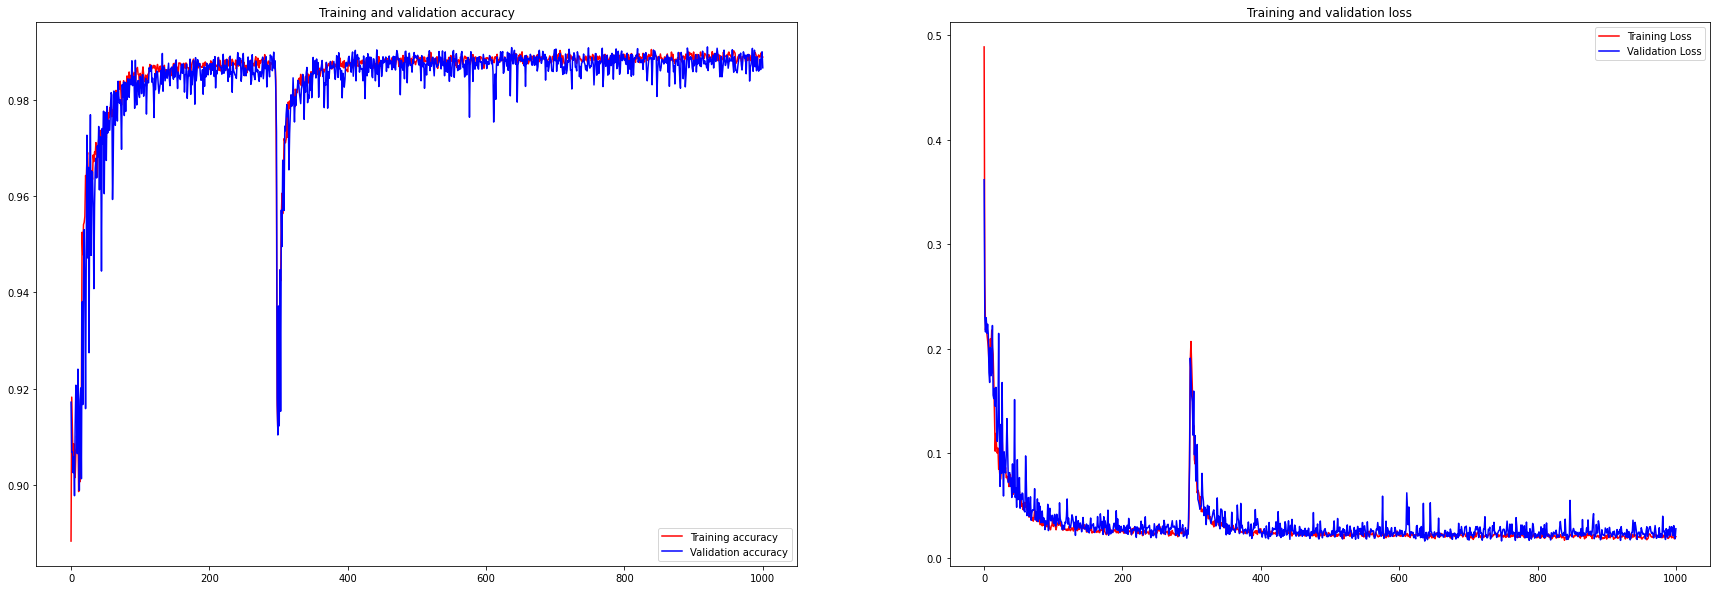

In [41]:
import matplotlib.pyplot as plt
# Let's take a look at how we did during training.
acc = history.history['model_acc']
val_acc = history.history['val_model_acc']

loss = history.history['model_loss']
val_loss = history.history['val_model_loss']
epochs = range(len(acc))

# Accuracy
fig, ax = plt.subplots(1, 2, figsize=(30, 10))
ax[0].plot(epochs, acc, 'r', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].set_title('Training and validation accuracy')
ax[0].legend()

# Loss
ax[1].plot(epochs, loss, 'r', label='Training Loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
ax[1].set_title('Training and validation loss')
ax[1].legend()

plt.show()

In [42]:
# model_save_path = '/tensorflow/siamese_model/siamese_unet_ubiris__seg_rotation_1001epoc.h5'
# model.save(model_save_path)

In [43]:
# model = load_model(model_save_path,custom_objects={'contrastive_loss':contrastive_loss_with_margin(margin=1)})

In [44]:
Out = next((imageLoader(path_input_images,folder_name_list_test,mask_path,1)))

In [45]:
images_L_R = Out[0]
image_L = images_L_R[0]
image_R = images_L_R[1]

mask_L_R_class = Out[1]

mask_L = mask_L_R_class[0]
mask_R = mask_L_R_class[1]
y = mask_L_R_class[2]
print(y[0])
print(image_L.shape)
#plt.title('left_mask')
#plt.imshow(np.squeeze(mask_R[1]))
#plt.imshow(image_R[1])
#plt.show()

1.0
(4, 128, 128, 3)


In [46]:




preds = model.predict([image_L,image_R])





1/1 [==============================] - 1s 920ms/step


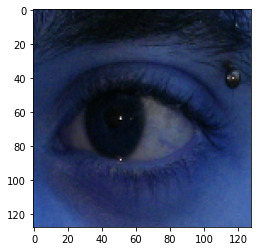

In [47]:

#plt.imshow(np.squeeze(mask_R[1]))
plt.imshow(image_R[1],cmap='gray')
plt.show()

In [48]:
out_image = np.squeeze(preds[1][1])
preds[0].shape

(4, 128, 128, 1)

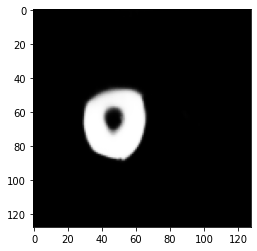

In [49]:

dummy_image = image_R[1].copy() 
dummy_image[out_image<.5] = 0
plt.imshow(out_image,cmap='gray')
plt.show()

In [50]:
y = preds[2]
print(y)

[[0.5249036 ]
 [0.17220427]
 [1.4776486 ]
 [1.5471015 ]]


## Test data for model 

In [51]:
test_out1,test_out2,test_seg1,test_seg2,y_class = read_simaese_parametric_data(path_input_images,folder_names[75:95],mask_path,20)

In [52]:
test_out1 = test_out1/255.0
test_out2 = test_out2/255.0
# test_seg1 = test_seg1/255.0
# test_seg2 = test_seg2/255.0

In [53]:
[test_seg_out1,test_seg_out2, y_pred] = model.predict([test_out1,test_out2])

3/3 [==============================] - 2s 105ms/step


In [54]:
test_seg2.shape

(80, 128, 128, 1)

In [55]:
len(y_class)

80

In [56]:
def show_images(test_out1,test_seg_out1):
    #num_images = len(test_seg_out1)
    num_images = 20
    for i in range(0,num_images,4):
        dummy_image = np.squeeze(test_out1[i]).copy()
        seg_img = np.squeeze(test_seg_out1[i])
        dummy_image[seg_img<.5] = 0
        plt.imshow(np.squeeze(test_out1[i]),cmap='gray')
        plt.show()
        plt.imshow(dummy_image,cmap='gray')
        plt.show()

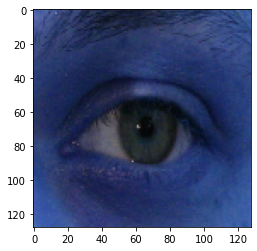

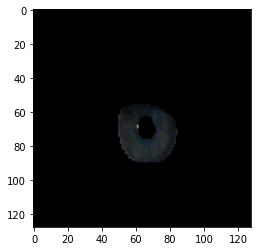

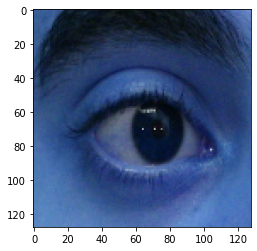

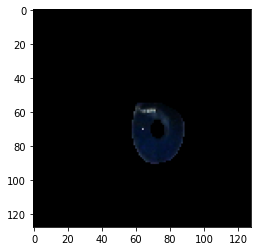

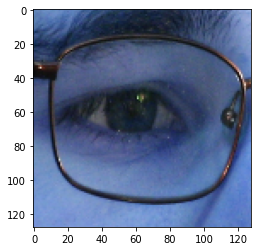

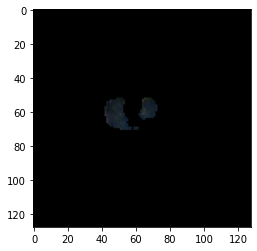

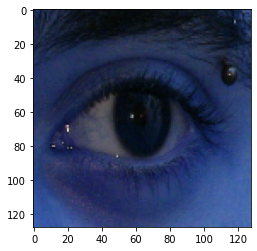

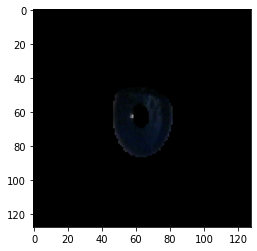

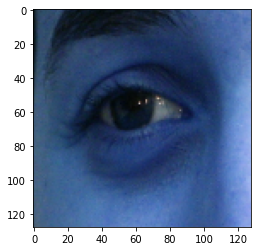

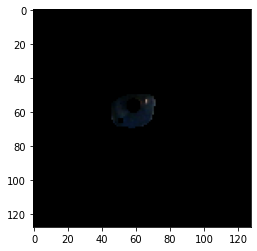

In [57]:
show_images(test_out2,test_seg_out2)

In [58]:
Y_pred = np.zeros(len(y_pred),dtype = 'float')
Y_pred[y_pred.ravel() < 1] = 1
# Y_pred

# # y_class
# len(Y_pred)

In [59]:
def compute_accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    pred = y_pred.ravel() #< .5
    count = 0
    for i in range(len(pred)):
        
        if (pred[i] == y_true[i]):
            count = count+1
        
        
    return count/len(pred)

In [60]:
# def compute_accuracy(y_true, y_pred):
#     '''Compute classification accuracy with a fixed threshold on distances.
#     '''
#     pred = y_pred.ravel() < 0.5
#     return np.mean(pred == y_true)

In [61]:
compute_accuracy(y_class, Y_pred)      ## trained on 120 images and tested on 100 persons 

0.9

In [64]:
!{sys.executable} -m pip install -U scikit-learn scipy

     |████████████████████████████████| 26.7 MB 173 kB/s            
     |████████████████████████████████| 41.6 MB 8.1 MB/s            
     |████████████████████████████████| 306 kB 10.6 MB/s            
  Attempting uninstall: scipy
    Found existing installation: scipy 1.3.3
    Uninstalling scipy-1.3.3:
      Successfully uninstalled scipy-1.3.3
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [69]:
import scipy.stats
from sklearn.metrics import confusion_matrix
#

confusion_matrix(y_class, y_pred.ravel() < 1)                      ##   [TN , FP]
                                                                     ##     [FN , TP] 

array([[32,  8],
       [ 0, 40]])

In [ ]:
def rotate_image_tensor(image, angle, mode='black'):
    """
    Rotates a 3D tensor (HWD), which represents an image by given radian angle.

    New image has the same size as the input image.

    mode controls what happens to border pixels.
    mode = 'black' results in black bars (value 0 in unknown areas)
    mode = 'white' results in value 255 in unknown areas
    mode = 'ones' results in value 1 in unknown areas
    mode = 'repeat' keeps repeating the closest pixel known
    """
    s = image.get_shape().as_list()
    assert len(s) == 3, "Input needs to be 3D."
    assert (mode == 'repeat') or (mode == 'black') or (mode == 'white') or (mode == 'ones'), "Unknown boundary mode."
    image_center = [np.floor(x/2) for x in s]

    # Coordinates of new image
    coord1 = tf.range(s[0])
    coord2 = tf.range(s[1])

    # Create vectors of those coordinates in order to vectorize the image
    coord1_vec = tf.tile(coord1, [s[1]])

    coord2_vec_unordered = tf.tile(coord2, [s[0]])
    coord2_vec_unordered = tf.reshape(coord2_vec_unordered, [s[0], s[1]])
    coord2_vec = tf.reshape(tf.transpose(coord2_vec_unordered, [1, 0]), [-1])

    # center coordinates since rotation center is supposed to be in the image center
    coord1_vec_centered = coord1_vec - image_center[0]
    coord2_vec_centered = coord2_vec - image_center[1]

    coord_new_centered = tf.cast(tf.pack([coord1_vec_centered, coord2_vec_centered]), tf.float32)

In [ ]:
  image = tf.constant(np.zeros((384, 512, 5)), dtype = tf.float32)
  image = tfa.image.rotate(image, tf.random.uniform(shape = [], minval = -0.3, maxval = 0.3))

In [ ]:
tf.random.uniform(shape = [], minval = -0.3, maxval = 0.3)

In [ ]:
tf.constant(0,dtype='float32')

In [ ]:
128*5 # (2*np.pi/360)*   

In [ ]:
c = tf.constant([1.0, 2.0, 3.0, 4.0])          #2x4 
d = tf.constant([3.0, 4.0, 1.0,2.0])  

In [ ]:
print(concatenate([c,d],axis=0)[0:4])

In [ ]:
# a = tf.squeeze(tf.constant(np.zeros((None,512)),dtype=tf.float32))
a = tf.zeros([None, 4], tf.float32)


In [ ]:
a